# ΕΙΣΑΓΩΓΙΚΗ ΣΤΑΤΙΣΤΙΚΗ ΜΕ PYTHON 
# ΙΙ. Οι Περιγραφικές Πολυμεταβλητές Στατιστικές 

[0. Πολυμεταβλητά Δεδομένα](#0)
* [0.1 Εμπερικλειόμενες (Nested) Λίστες Τυχαίων Αριθμών](#0.1): 
    * [0.1a dfrdata](#0.1a) 
* [0.2 Πολυμεταβλητά Δεδομένα ως DataFrames](#0.2):
    * [0.2a dfrdata2](#0.2a) | [0.2b ddf](#0.2b) | [0.2c mtcars](#0.2c) | [0.2d diamonds](#0.2d) | [0.2e anscombe](#0.2e) | [0.2f tips](#0.2f)
* [0.3 Χειρισμός Ελλειπουσών Τιμών](#0.3)
    * [0.3a dfrn](#0.3a) | [0.3b airquality](#0.3b) | [0.3c brain_size](#0.3c)
    
[1. Βασικές Πολυμεταβλητές Στατιστικές](#1)
* [1.1 Συνδιακύμανση](#1.1)
    * [1.1a dfrdata2](#1.1a) | [1.1b mtcars](#1.1b) | [1.1c diamonds](#1.1c)
* [1.2 Συσχέτιση (Συντελεστής Συσχέτισης του Pearson)](#1.2)
    * [1.2a dfrdata2](#1.2a) | [1.2b mtcars](#1.2b) | [1.2c diamonds](#1.2c)
* [1.3 Πίνακες Συμπτώσεων](#1.3)
    * [1.3a tips](#1.3a) | [1.3b mtcars](#1.3b)
* [1.4 Στατιστικές Συμπτώσεων](#1.4)
    * [1.4a tips](#1.4a) | [1.4b mtcars](#1.4b) | [1.4c diamonds](#1.4c)

[2. Σχεδιαγράμματα Πολυμεταβλητών Στατιστικών](#2)
* [2.1 Σχεδιαγράμματα Πολλαπλών Μεταβλητών](#2.1)
    * [2.1a tips](#2.1a) | [2.1b mtcars](#2.1b) | [2.1c diamonds](#2.1c)
* [2.2 Σχεδιαγράμματα Συμπτώσεων Δυο Μεταβλητών](#2.2)
    * [2.2a tips](#2.2a) | [2.2b mtcars](#2.2b) | [2.2c diamonds](#2.2c)
* [2.3 Διαγράμματα Διασποράς](#2.3)
    * [2.3a df](#2.3a) | [2.3b tips](#2.3b) | [2.3c mtcars](#2.3c) | [2.3d diamonds](#2.3d) | [2.3e iris](#2.3e)

### Το επόμενο κελί περιέχει όλα τα μόντουλ που χρειάζονται να εισαχθούν στη συνέχεια και ΠΡΕΠΕΙ ΝΑ ΕΚΤΑΛΕΣΘΕΙ ΑΠΟ ΤΗΝ ΑΡΧΗ.

In [1]:
# import math
import random
import csv
import urllib2
# from collections import Counter
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
# from scipy import stats, integrate
import seaborn as sns       # pip install seaborn
sns.set_style("white")      # For seaborn to show axes in iPython Notebook
import matplotlib.pyplot as plt
from ggplot import *
# from matplotlib import cm

# For printing plots in iPython Notebook cells
%matplotlib inline 

<a id='0'></a>
# 0. ΠΟΛΥΜΕΤΑΒΛΗΤΑ ΔΕΔΟΜΕΝΑ

<a id='0.1'></a>
## 0.1 Εμπερικλειόμενες (Nested) Λίστες Τυχαίων Αριθμών

<a id='0.1a'></a>
### 0.1a dfrdata

#### Λίστες στηλών (εκτός από λίστα headers)

In [2]:
n = 21 # Number of number of rows (cases or items)
m = 5  # Number of columns (variables)

headers = ['names', 'height', 'weight', 'age']
names = ['John','Jane','Jack','Jenny','Andy','Anne','Bill','Pete','Mary','Sarah','Katy','Brian','David','Helen','Mike',
        'Ruth','Alex','Keith','Linda','Dawn']
height = [x/100. for x in range(159,198,2)]
random.shuffle(height)
weight = [random.randrange(500,1000,3)/10. for _ in range(20)]
age =[random.choice(range(27,67)) for _ in range(20)]

#### Μετατροπή σε λίστες γραμμών (arrays)

In [3]:
rdata = []
for i in range(20):
    rdata.append([names[i],height[i],weight[i],age[i]])

In [4]:
dfrdata = pd.DataFrame(rdata, columns=headers)
dfrdata

names  height  weight  age
0    John    1.71    70.4   42
1    Jane    1.91    97.7   64
2    Jack    1.75    63.8   65
3   Jenny    1.95    58.7   51
4    Andy    1.63    95.6   44
5    Anne    1.93    72.8   30
6    Bill    1.87    53.0   28
7    Pete    1.65    68.6   55
8    Mary    1.97    92.0   65
9   Sarah    1.61    98.9   52
10   Katy    1.59    69.2   30
11  Brian    1.85    68.9   39
12  David    1.67    77.9   53
13  Helen    1.79    71.3   32
14   Mike    1.89    55.1   33
15   Ruth    1.83    80.9   51
16   Alex    1.73    50.6   31
17  Keith    1.69    98.3   45
18  Linda    1.81    85.7   55
19   Dawn    1.77    56.6   63

#### Πρόσβαση σε λίστες στηλών/μεταβλητών από DataFrame

In [5]:
print dfrdata['weight'], type(dfrdata['weight'])
print dfrdata['weight'].tolist(), type(dfrdata['weight'].tolist())
print list(dfrdata['weight'])
list(dfrdata['weight']) == dfrdata['weight'].tolist()

0     70.4
1     97.7
2     63.8
3     58.7
4     95.6
5     72.8
6     53.0
7     68.6
8     92.0
9     98.9
10    69.2
11    68.9
12    77.9
13    71.3
14    55.1
15    80.9
16    50.6
17    98.3
18    85.7
19    56.6
Name: weight, dtype: float64 <class 'pandas.core.series.Series'>
[70.400000000000006, 97.700000000000003, 63.799999999999997, 58.700000000000003, 95.599999999999994, 72.799999999999997, 53.0, 68.599999999999994, 92.0, 98.900000000000006, 69.200000000000003, 68.900000000000006, 77.900000000000006, 71.299999999999997, 55.100000000000001, 80.900000000000006, 50.600000000000001, 98.299999999999997, 85.700000000000003, 56.600000000000001] <type 'list'>
[70.400000000000006, 97.700000000000003, 63.799999999999997, 58.700000000000003, 95.599999999999994, 72.799999999999997, 53.0, 68.599999999999994, 92.0, 98.900000000000006, 69.200000000000003, 68.900000000000006, 77.900000000000006, 71.299999999999997, 55.100000000000001, 80.900000000000006, 50.600000000000001, 98.299999999999

True

#### Πρόσβαση στις (μοναδικές) τιμές μιας στήλης/μεταβλητής

In [6]:
print dfrdata.names.unique()
print dfrdata.age.unique()
print dfrdata.names.unique().tolist()
print dfrdata.age.unique().tolist()

['John' 'Jane' 'Jack' 'Jenny' 'Andy' 'Anne' 'Bill' 'Pete' 'Mary' 'Sarah'
 'Katy' 'Brian' 'David' 'Helen' 'Mike' 'Ruth' 'Alex' 'Keith' 'Linda' 'Dawn']
[42 64 65 51 44 30 28 55 52 39 53 32 33 31 45 63]
['John', 'Jane', 'Jack', 'Jenny', 'Andy', 'Anne', 'Bill', 'Pete', 'Mary', 'Sarah', 'Katy', 'Brian', 'David', 'Helen', 'Mike', 'Ruth', 'Alex', 'Keith', 'Linda', 'Dawn']
[42, 64, 65, 51, 44, 30, 28, 55, 52, 39, 53, 32, 33, 31, 45, 63]


In [7]:
print pd.unique(dfrdata.names.ravel())
print pd.unique(dfrdata.age.ravel())
print pd.unique(dfrdata.names.ravel()).tolist()
print pd.unique(dfrdata.age.ravel()).tolist()

['John' 'Jane' 'Jack' 'Jenny' 'Andy' 'Anne' 'Bill' 'Pete' 'Mary' 'Sarah'
 'Katy' 'Brian' 'David' 'Helen' 'Mike' 'Ruth' 'Alex' 'Keith' 'Linda' 'Dawn']
[42 64 65 51 44 30 28 55 52 39 53 32 33 31 45 63]
['John', 'Jane', 'Jack', 'Jenny', 'Andy', 'Anne', 'Bill', 'Pete', 'Mary', 'Sarah', 'Katy', 'Brian', 'David', 'Helen', 'Mike', 'Ruth', 'Alex', 'Keith', 'Linda', 'Dawn']
[42, 64, 65, 51, 44, 30, 28, 55, 52, 39, 53, 32, 33, 31, 45, 63]


#### Σώσιμο DataFrame σε csv 

In [8]:
dfrdata.to_csv('data1.csv', sep='\t', index=False)  # sep = ';','\t'
# dfrdata.to_csv('data1.csv', sep='\t', encoding='utf-8')

#### Άνοιγμα/εισαγωγή csv ως DataFrame

In [9]:
dfrdata1 = pd.read_csv('data1.csv', sep='\t')
dfrdata1

names  height  weight  age
0    John    1.71    70.4   42
1    Jane    1.91    97.7   64
2    Jack    1.75    63.8   65
3   Jenny    1.95    58.7   51
4    Andy    1.63    95.6   44
5    Anne    1.93    72.8   30
6    Bill    1.87    53.0   28
7    Pete    1.65    68.6   55
8    Mary    1.97    92.0   65
9   Sarah    1.61    98.9   52
10   Katy    1.59    69.2   30
11  Brian    1.85    68.9   39
12  David    1.67    77.9   53
13  Helen    1.79    71.3   32
14   Mike    1.89    55.1   33
15   Ruth    1.83    80.9   51
16   Alex    1.73    50.6   31
17  Keith    1.69    98.3   45
18  Linda    1.81    85.7   55
19   Dawn    1.77    56.6   63

<a id='0.2'></a>
## 0.2 Πολυμεταβλητά Δεδομένα ως DataFrames

### Κατασκευή DataFrame με Τυχαίους Αριθμούς

<a id='0.2a'></a>
### 0.2a dfrdata2

In [10]:
dfrdata2 = pd.DataFrame(np.random.randn(10,6))
print dfrdata2.columns
dfrdata2

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')


0         1         2         3         4         5
0 -0.366863 -0.431465 -0.685859  0.569171 -0.776515  0.362305
1 -0.074104  0.376148 -1.404119 -0.771111  0.608717  0.995666
2 -1.223258  0.208400 -0.108145 -0.732443 -1.050354 -2.901026
3 -1.217244 -1.088513  0.141427 -0.267123  0.062773  2.086533
4  0.531214 -1.655692 -0.207791 -0.361784  0.394630  0.784061
5 -0.333306 -2.197696  0.644674  0.329138  0.614993 -0.835839
6 -0.901853  0.961989  0.535934  0.575925 -2.661211 -0.655942
7 -0.557851  0.201069  0.976106  0.865203 -0.416897 -1.436916
8 -0.422007 -2.581001 -0.287470  0.261770 -1.177173 -1.297228
9  2.604203 -0.773562 -0.801338  0.104547  1.105968 -0.891796

In [11]:
dfrdata2 = dfrdata2.rename(columns={0:'Var0',1:'Var1',2:'Var2',3:'Var3',4:'Var4',5:'Var5',})
dfrdata2

Var0      Var1      Var2      Var3      Var4      Var5
0 -0.366863 -0.431465 -0.685859  0.569171 -0.776515  0.362305
1 -0.074104  0.376148 -1.404119 -0.771111  0.608717  0.995666
2 -1.223258  0.208400 -0.108145 -0.732443 -1.050354 -2.901026
3 -1.217244 -1.088513  0.141427 -0.267123  0.062773  2.086533
4  0.531214 -1.655692 -0.207791 -0.361784  0.394630  0.784061
5 -0.333306 -2.197696  0.644674  0.329138  0.614993 -0.835839
6 -0.901853  0.961989  0.535934  0.575925 -2.661211 -0.655942
7 -0.557851  0.201069  0.976106  0.865203 -0.416897 -1.436916
8 -0.422007 -2.581001 -0.287470  0.261770 -1.177173 -1.297228
9  2.604203 -0.773562 -0.801338  0.104547  1.105968 -0.891796

In [12]:
print dfrdata2['Var2'], type(dfrdata2['Var2'])
print dfrdata2['Var2'].tolist(), type(dfrdata2['Var2'].tolist())
print list(dfrdata2['Var2'])
list(dfrdata2['Var2']) == dfrdata2['Var2'].tolist()

0   -0.685859
1   -1.404119
2   -0.108145
3    0.141427
4   -0.207791
5    0.644674
6    0.535934
7    0.976106
8   -0.287470
9   -0.801338
Name: Var2, dtype: float64 <class 'pandas.core.series.Series'>
[-0.68585881260277859, -1.4041192009219394, -0.10814462269373591, 0.14142742294447619, -0.20779108126801168, 0.64467441345233412, 0.5359340261977279, 0.97610616930754479, -0.28746952068686316, -0.80133814329058306] <type 'list'>
[-0.68585881260277859, -1.4041192009219394, -0.10814462269373591, 0.14142742294447619, -0.20779108126801168, 0.64467441345233412, 0.5359340261977279, 0.97610616930754479, -0.28746952068686316, -0.80133814329058306]


True

In [13]:
dfrdata2_vars = []
for i in dfrdata2.columns:
    dfrdata2_vars.append(list(dfrdata2[i]))
# dfrdata2_vars

### Κατασκευή DataFrame από λεξικό

<a id='0.2b'></a>
### 0.2b ddf

In [14]:
datadict = {'occupation': ['painter','actor','author','singer','student','manager','singer'],
            'city': ['Athens','Paris','London','Rome','Tokyo','New York','Lima'],
            'year': [1980,1998,2003,1977,1992,1977,1985],
            'reports': [5,14,22,8,31,26,17]}
for key, value in datadict.items():
    print key, 'has length', len(value)
ddf = pd.DataFrame(datadict, index = range(7))
print ddf.shape
ddf

city has length 7
year has length 7
reports has length 7
occupation has length 7
(7, 4)


city occupation  reports  year
0    Athens    painter        5  1980
1     Paris      actor       14  1998
2    London     author       22  2003
3      Rome     singer        8  1977
4     Tokyo    student       31  1992
5  New York    manager       26  1977
6      Lima     singer       17  1985

In [15]:
print ddf.city.unique()
print ddf.occupation.unique()
print ddf.reports.unique()
print ddf.year.unique()
# print pd.unique(ddf.city.ravel())
# print pd.unique(ddf.occupation.ravel())
# print pd.unique(ddf.reports.ravel())
# print pd.unique(ddf.year.ravel())

['Athens' 'Paris' 'London' 'Rome' 'Tokyo' 'New York' 'Lima']
['painter' 'actor' 'author' 'singer' 'student' 'manager']
[ 5 14 22  8 31 26 17]
[1980 1998 2003 1977 1992 1985]


<a id='0.2c'></a>
### 0.2c mtcars

In [16]:
mtcars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
print mtcars.shape
print mtcars.columns
mtcars

(32, 12)
Index([u'Unnamed: 0', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec',
       u'vs', u'am', u'gear', u'carb'],
      dtype='object')


Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

In [17]:
mtcars = mtcars.rename(columns={'Unnamed: 0': 'Cars'})
mtcars.columns

Index([u'Cars', u'mpg', u'cyl', u'disp', u'hp', u'drat', u'wt', u'qsec', u'vs',
       u'am', u'gear', u'carb'],
      dtype='object')

<a id='0.2d'></a>
### 0.2d diamonds

In [18]:
diamonds = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv")
print diamonds.shape
print diamonds.info()

diamonds = diamonds.rename(columns={'Unnamed: 0': '#'})
print diamonds.columns

diamonds.isnull().any().any() # Check for missing values

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB
None
Index([u'#', u'carat', u'cut', u'color', u'clarity', u'depth', u'table',
       u'price', u'x', u'y', u'z'],
      dtype='object')


False

In [19]:
diamonds.head(5)
# diamonds.head(n=5)

#  carat      cut color clarity  depth  table  price     x     y     z
0  1   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
1  2   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
2  3   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31
3  4   0.29  Premium     I     VS2   62.4     58    334  4.20  4.23  2.63
4  5   0.31     Good     J     SI2   63.3     58    335  4.34  4.35  2.75

In [20]:
diamonds.iloc[range(5)]

#  carat      cut color clarity  depth  table  price     x     y     z
0  1   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
1  2   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
2  3   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31
3  4   0.29  Premium     I     VS2   62.4     58    334  4.20  4.23  2.63
4  5   0.31     Good     J     SI2   63.3     58    335  4.34  4.35  2.75

In [21]:
diamonds.ix[range(5)]

#  carat      cut color clarity  depth  table  price     x     y     z
0  1   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
1  2   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
2  3   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31
3  4   0.29  Premium     I     VS2   62.4     58    334  4.20  4.23  2.63
4  5   0.31     Good     J     SI2   63.3     58    335  4.34  4.35  2.75

In [22]:
diamonds.iloc[range(1000,1005)]

#  carat    cut color clarity  depth  table  price     x     y     z
1000  1001   0.75  Ideal     D     SI1   62.3     55   2898  5.83  5.80  3.62
1001  1002   0.77  Ideal     D     SI1   62.6     57   2898  5.92  5.81  3.67
1002  1003   0.98   Good     H     SI2   57.9     56   2898  6.51  6.47  3.76
1003  1004   0.79  Ideal     G     SI1   61.1     57   2898  5.98  5.93  3.64
1004  1005   0.79  Ideal     G     SI1   62.3     57   2898  5.90  5.85  3.66

In [23]:
diamonds.ix[range(1000,1005)]

#  carat    cut color clarity  depth  table  price     x     y     z
1000  1001   0.75  Ideal     D     SI1   62.3     55   2898  5.83  5.80  3.62
1001  1002   0.77  Ideal     D     SI1   62.6     57   2898  5.92  5.81  3.67
1002  1003   0.98   Good     H     SI2   57.9     56   2898  6.51  6.47  3.76
1003  1004   0.79  Ideal     G     SI1   61.1     57   2898  5.98  5.93  3.64
1004  1005   0.79  Ideal     G     SI1   62.3     57   2898  5.90  5.85  3.66

In [24]:
diamonds.iloc[range(53940)[-5:]]

#  carat        cut color clarity  depth  table  price     x     y  \
53935  53936   0.72      Ideal     D     SI1   60.8     57   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1     55   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8     60   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0     58   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2     55   2757  5.83  5.87   

          z  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64

In [25]:
diamonds.ix[range(53940)[-5:]]

#  carat        cut color clarity  depth  table  price     x     y  \
53935  53936   0.72      Ideal     D     SI1   60.8     57   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1     55   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8     60   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0     58   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2     55   2757  5.83  5.87   

          z  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64

In [26]:
diamonds.tail(5)

#  carat        cut color clarity  depth  table  price     x     y  \
53935  53936   0.72      Ideal     D     SI1   60.8     57   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1     55   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8     60   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0     58   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2     55   2757  5.83  5.87   

          z  
53935  3.50  
53936  3.61  
53937  3.56  
53938  3.74  
53939  3.64

In [27]:
print diamonds.cut.unique()
print diamonds.color.unique()
print diamonds.clarity.unique()
# print pd.unique(diamonds.cut.ravel())
# print pd.unique(diamonds.color.ravel())
# print pd.unique(diamonds.clarity.ravel())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<a id='0.2e'></a>
### 0.2e anscombe

In [28]:
anscombe = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv")
print anscombe.shape
print anscombe.columns
anscombe

(11, 9)
Index([u'Unnamed: 0', u'x1', u'x2', u'x3', u'x4', u'y1', u'y2', u'y3', u'y4'], dtype='object')


Unnamed: 0  x1  x2  x3  x4     y1    y2     y3     y4
0            1  10  10  10   8   8.04  9.14   7.46   6.58
1            2   8   8   8   8   6.95  8.14   6.77   5.76
2            3  13  13  13   8   7.58  8.74  12.74   7.71
3            4   9   9   9   8   8.81  8.77   7.11   8.84
4            5  11  11  11   8   8.33  9.26   7.81   8.47
5            6  14  14  14   8   9.96  8.10   8.84   7.04
6            7   6   6   6   8   7.24  6.13   6.08   5.25
7            8   4   4   4  19   4.26  3.10   5.39  12.50
8            9  12  12  12   8  10.84  9.13   8.15   5.56
9           10   7   7   7   8   4.82  7.26   6.42   7.91
10          11   5   5   5   8   5.68  4.74   5.73   6.89

<a id='0.2f'></a>
### tips

In [29]:
tips = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv")
print tips.shape
print tips.columns
tips.head(n=4)

(244, 8)
Index([u'Unnamed: 0', u'total_bill', u'tip', u'sex', u'smoker', u'day',
       u'time', u'size'],
      dtype='object')


Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           1       16.99  1.01  Female     No  Sun  Dinner     2
1           2       10.34  1.66    Male     No  Sun  Dinner     3
2           3       21.01  3.50    Male     No  Sun  Dinner     3
3           4       23.68  3.31    Male     No  Sun  Dinner     2

In [30]:
print tips.sex.unique()
print tips.smoker.unique()
print tips.day.unique()
print tips.time.unique()
# print pd.unique(tips.sex.ravel())
# print pd.unique(tips.smoker.ravel())
# print pd.unique(tips.day.ravel())
# print pd.unique(tips.time.ravel())

['Female' 'Male']
['No' 'Yes']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


<a id='0.3'></a>
## 0.3 Χειρισμός Ελλειπουσών Τιμών

### Κατασκευή DataFrame με Τυχαίους Αριθμούς και Ελλείπουσες Τιμές

<a id='0.3a'></a>
### 0.3a dfrn

In [31]:
dfrn = pd.DataFrame(np.random.randn(10,4))
dfrn.iloc[1:4,0] = np.nan
dfrn.iloc[5,2] = np.nan
dfrn.iloc[7:9,3] = np.nan
print dfrn.shape
dfrn

(10, 4)


0         1         2         3
0 -0.002234  0.944920  0.798269  0.628240
1       NaN -1.200497  0.012764 -0.189813
2       NaN  0.778212 -0.281800  0.576224
3       NaN -0.848005 -2.265523 -0.275817
4 -0.038119 -0.739363  1.396425  0.985567
5 -0.690161  1.402904       NaN  0.030942
6  0.566199 -0.648754  0.022892 -1.128979
7 -0.887872 -0.862830  1.181882       NaN
8  0.458658  0.682899 -1.189286       NaN
9 -0.316735  0.907706 -0.635395 -0.612830

In [32]:
dfrn = pd.DataFrame(np.random.randn(10,4))
dfrn.iloc[1:4,0] = None
dfrn.iloc[5,2] = None
dfrn.iloc[7:9,3] = None
print dfrn.shape
dfrn


(10, 4)


0         1         2         3
0 -1.140052  0.862621  0.189475 -0.569489
1       NaN  0.405521  0.161301 -0.131605
2       NaN  1.564264  0.167892 -0.750232
3       NaN -0.589015  2.243770 -0.039907
4 -0.097121  0.028952  1.192540  1.194480
5  0.278410 -0.031162       NaN -0.420278
6  0.812278 -0.457516  0.049665 -0.492557
7 -0.833233 -1.106045 -0.294830       NaN
8  1.410110 -1.592334  0.209254       NaN
9  0.279951 -0.934371  1.788206 -0.890127

In [33]:
print dfrn.isnull().any().any()
print dfrn.isnull().any()
print dfrn.isnull().sum().sum()
dfrn.isnull().sum()

True
0     True
1    False
2     True
3     True
dtype: bool
6


0    3
1    0
2    1
3    2
dtype: int64

In [34]:
dfrn = dfrn.dropna()
print dfrn.isnull().any().any()
dfrn.isnull().sum().sum()
print dfrn.shape
dfrn

False
(4, 4)


0         1         2         3
0 -1.140052  0.862621  0.189475 -0.569489
4 -0.097121  0.028952  1.192540  1.194480
6  0.812278 -0.457516  0.049665 -0.492557
9  0.279951 -0.934371  1.788206 -0.890127

<a id='0.3b'></a>
### 0.3b airquality

In [35]:
airquality = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/airquality.csv")
print airquality.shape
print airquality.columns
# airquality

(153, 7)
Index([u'Unnamed: 0', u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month',
       u'Day'],
      dtype='object')


In [36]:
print airquality.isnull().any().any()
print airquality.isnull().any()
print airquality.isnull().sum().sum()
airquality.isnull().sum()

True
Unnamed: 0    False
Ozone          True
Solar.R        True
Wind          False
Temp          False
Month         False
Day           False
dtype: bool
44


Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [37]:
airquality = airquality.dropna()
print airquality.isnull().any().any()
print airquality.isnull().sum().sum()
print airquality.shape
print airquality.columns
airquality.head(n=4)

False
0
(111, 7)
Index([u'Unnamed: 0', u'Ozone', u'Solar.R', u'Wind', u'Temp', u'Month',
       u'Day'],
      dtype='object')


Unnamed: 0  Ozone  Solar.R  Wind  Temp  Month  Day
0           1     41      190   7.4    67      5    1
1           2     36      118   8.0    72      5    2
2           3     12      149  12.6    74      5    3
3           4     18      313  11.5    62      5    4

<a id='0.3c'></a>
### 0.3c brain_size

In [38]:
brainsize = pd.read_csv("brain_size.csv",sep=';')
print brainsize.shape
print brainsize.isnull().any().any()
print brainsize.isnull().any()
print brainsize.isnull().sum().sum()
brainsize.isnull().sum()

(40, 8)
False
Unnamed: 0    False
Gender        False
FSIQ          False
VIQ           False
PIQ           False
Weight        False
Height        False
MRI_Count     False
dtype: bool
0


Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        0
Height        0
MRI_Count     0
dtype: int64

In [39]:
brainsize

Unnamed: 0  Gender  FSIQ  VIQ  PIQ Weight Height  MRI_Count
0            1  Female   133  132  124    118   64.5     816932
1            2    Male   140  150  124      .   72.5    1001121
2            3    Male   139  123  150    143   73.3    1038437
3            4    Male   133  129  128    172   68.8     965353
4            5  Female   137  132  134    147   65.0     951545
5            6  Female    99   90  110    146   69.0     928799
6            7  Female   138  136  131    138   64.5     991305
7            8  Female    92   90   98    175   66.0     854258
8            9    Male    89   93   84    134   66.3     904858
9           10    Male   133  114  147    172   68.8     955466
10          11  Female   132  129  124    118   64.5     833868
11          12    Male   141  150  128    151   70.0    1079549
12          13    Male   135  129  124    155   69.0     924059
13          14  Female   140  120  147    155   70.5     856472
14          15  Female    96  100   90    146   66.0     878897
15          16  Female    83   71   96    135   68.0     865363
16          17  Female   132  132  120    127   68.5     852244
17          18    Male   100   96  102    178   73.5     945088
18          19  Female   101  112   84    136   66.3     808020
19          20    Male    80   77   86    180   70.0     889083
20          21    Male    83   83   86      .      .     892420
21          22    Male    97  107   84    186   76.5     905940
22          23  Female   135  129  134    122   62.0     790619
23          24    Male   139  145  128    132   68.0     955003
24          25  Female    91   86  102    114   63.0     831772
25          26    Male   141  145  131    171   72.0     935494
26          27  Female    85   90   84    140   68.0     798612
27          28    Male   103   96  110    187   77.0    1062462
28          29  Female    77   83   72    106   63.0     793549
29          30  Female   130  126  124    159   66.5     866662
30          31  Female   133  126  132    127   62.5     857782
31          32    Male   144  145  137    191   67.0     949589
32          33    Male   103   96  110    192   75.5     997925
33          34    Male    90   96   86    181   69.0     879987
34          35  Female    83   90   81    143   66.5     834344
35          36  Female   133  129  128    153   66.5     948066
36          37    Male   140  150  124    144   70.5     949395
37          38  Female    88   86   94    139   64.5     893983
38          39    Male    81   90   74    148   74.0     930016
39          40    Male    89   91   89    179   75.5     935863

In [40]:
df = brainsize
df['Weight'].replace('.', np.nan, inplace=True)
df['Height'].replace('.', np.nan, inplace=True)
brainsize = df.dropna()
print brainsize.isnull().any().any()
print brainsize.isnull().sum().sum()
print brainsize.shape
brainsize

False
0
(38, 8)


Unnamed: 0  Gender  FSIQ  VIQ  PIQ Weight Height  MRI_Count
0            1  Female   133  132  124    118   64.5     816932
2            3    Male   139  123  150    143   73.3    1038437
3            4    Male   133  129  128    172   68.8     965353
4            5  Female   137  132  134    147   65.0     951545
5            6  Female    99   90  110    146   69.0     928799
6            7  Female   138  136  131    138   64.5     991305
7            8  Female    92   90   98    175   66.0     854258
8            9    Male    89   93   84    134   66.3     904858
9           10    Male   133  114  147    172   68.8     955466
10          11  Female   132  129  124    118   64.5     833868
11          12    Male   141  150  128    151   70.0    1079549
12          13    Male   135  129  124    155   69.0     924059
13          14  Female   140  120  147    155   70.5     856472
14          15  Female    96  100   90    146   66.0     878897
15          16  Female    83   71   96    135   68.0     865363
16          17  Female   132  132  120    127   68.5     852244
17          18    Male   100   96  102    178   73.5     945088
18          19  Female   101  112   84    136   66.3     808020
19          20    Male    80   77   86    180   70.0     889083
21          22    Male    97  107   84    186   76.5     905940
22          23  Female   135  129  134    122   62.0     790619
23          24    Male   139  145  128    132   68.0     955003
24          25  Female    91   86  102    114   63.0     831772
25          26    Male   141  145  131    171   72.0     935494
26          27  Female    85   90   84    140   68.0     798612
27          28    Male   103   96  110    187   77.0    1062462
28          29  Female    77   83   72    106   63.0     793549
29          30  Female   130  126  124    159   66.5     866662
30          31  Female   133  126  132    127   62.5     857782
31          32    Male   144  145  137    191   67.0     949589
32          33    Male   103   96  110    192   75.5     997925
33          34    Male    90   96   86    181   69.0     879987
34          35  Female    83   90   81    143   66.5     834344
35          36  Female   133  129  128    153   66.5     948066
36          37    Male   140  150  124    144   70.5     949395
37          38  Female    88   86   94    139   64.5     893983
38          39    Male    81   90   74    148   74.0     930016
39          40    Male    89   91   89    179   75.5     935863

<a id='1'></a>
# 1. ΒΑΣΙΚΕΣ ΠΟΛΥΜΕΤΑΒΛΗΤΕΣ ΣΤΑΤΙΣΤΙΚΕΣ

<a id='1.1'></a>
## 1.1 Συνδιακύμανση

Η **συνδιακύμανση** δυο μεταβλητών $x = (x_1, x_2, \ldots, x_n)$ και $y = (y_1, y_2, \ldots, y_n)$ με μέσες τιμές $\bar{x}$ και $\bar{y}$, αντιστοίχως, ορίζεται ως 

\begin{equation}
\frac{1}{n} \sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})
\end{equation}

Η **δειγματική συνδιακύμανση** των μεταβλητών αυτών ορίζεται ως 

\begin{equation}
\frac{1}{n - 1} \sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})
\end{equation}

In [41]:
def covariance(x,y):
    return sum([(xi - np.mean(x))*(yi - np.mean(y)) for (xi, yi) in zip(x,y)])/float(len(x))
def scovariance(x,y):
    return sum([(xi - np.mean(x))*(yi - np.mean(y)) for (xi, yi) in zip(x,y)])/float(len(x)-1)

<a id='0.1a'></a>
### 1.1a dfrdata2

In [42]:
x = dfrdata2_vars[1]
y = dfrdata2_vars[3]
print covariance(x,y), scovariance(x,y)
print np.cov(x,y)[1,0]
print np.cov(x,y)
dfrdata2.cov()

-0.0150171719326 -0.0166857465918
-0.0166857465918
[[ 1.38671663 -0.01668575]
 [-0.01668575  0.32138536]]


Var0      Var1      Var2      Var3      Var4      Var5
Var0  1.245703 -0.246721 -0.359722  0.004415  0.757356  0.041352
Var1 -0.246721  1.386717 -0.027006 -0.016686 -0.498818 -0.182937
Var2 -0.359722 -0.027006  0.528227  0.231546 -0.295611 -0.317730
Var3  0.004415 -0.016686  0.231546  0.321385 -0.221793 -0.154374
Var4  0.757356 -0.498818 -0.295611 -0.221793  1.265961  0.548303
Var5  0.041352 -0.182937 -0.317730 -0.154374  0.548303  2.082456

<a id='1.1b'></a>
### 1.1b mtcars

In [43]:
print mtcars[['hp','wt']].cov()
print 'cov(hp,wt) =', mtcars[['hp','wt']].cov().hp[1]
mtcars.cov()

             hp         wt
hp  4700.866935  44.192661
wt    44.192661   0.957379
cov(hp,wt) = 44.1926612903


mpg         cyl          disp           hp       drat  \
mpg    36.324103   -9.172379   -633.097208  -320.732056   2.195064   
cyl    -9.172379    3.189516    199.660282   101.931452  -0.668367   
disp -633.097208  199.660282  15360.799829  6721.158669 -47.064019   
hp   -320.732056  101.931452   6721.158669  4700.866935 -16.451109   
drat    2.195064   -0.668367    -47.064019   -16.451109   0.285881   
wt     -5.116685    1.367371    107.684204    44.192661  -0.372721   
qsec    4.509149   -1.886855    -96.051681   -86.770081   0.087141   
vs      2.017137   -0.729839    -44.377621   -24.987903   0.118649   
am      1.803931   -0.465726    -36.564012    -8.320565   0.190151   
gear    2.135685   -0.649194    -50.802621    -6.358871   0.275988   
carb   -5.363105    1.520161     79.068750    83.036290  -0.078407   

              wt       qsec         vs         am       gear       carb  
mpg    -5.116685   4.509149   2.017137   1.803931   2.135685  -5.363105  
cyl     1.367371  -1.886855  -0.729839  -0.465726  -0.649194   1.520161  
disp  107.684204 -96.051681 -44.377621 -36.564012 -50.802621  79.068750  
hp     44.192661 -86.770081 -24.987903  -8.320565  -6.358871  83.036290  
drat   -0.372721   0.087141   0.118649   0.190151   0.275988  -0.078407  
wt      0.957379  -0.305482  -0.273661  -0.338105  -0.421081   0.675790  
qsec   -0.305482   3.193166   0.670565  -0.204960  -0.280403  -1.894113  
vs     -0.273661   0.670565   0.254032   0.042339   0.076613  -0.463710  
am     -0.338105  -0.204960   0.042339   0.248992   0.292339   0.046371  
gear   -0.421081  -0.280403   0.076613   0.292339   0.544355   0.326613  
carb    0.675790  -1.894113  -0.463710   0.046371   0.326613   2.608871

<a id='1.1c'></a>
### 1.1c diamonds

In [44]:
print diamonds[['table','y']].cov()
print 'cov(y,table) =', diamonds[['table','y']].cov().y[0]
diamonds.cov()

          table         y
table  4.992948  0.468972
y      0.468972  1.304472
cov(y,table) = 0.468972277805


#        carat       depth        table            price  \
#      2.424648e+08 -2789.881850 -776.314805 -3508.278095 -19063172.878038   
carat -2.789882e+03     0.224687    0.019167     0.192365      1742.765364   
depth -7.763148e+02     0.019167    2.052404    -0.946840       -60.853712   
table -3.508278e+03     0.192365   -0.946840     4.992948      1133.318064   
price -1.906317e+07  1742.765364  -60.853712  1133.318064  15915629.424301   
x     -7.081931e+03     0.518484   -0.040641     0.489643      3958.021491   
y     -7.039864e+03     0.515248   -0.048009     0.468972      3943.270810   
z     -4.386754e+03     0.318917    0.095968     0.237996      2424.712613   

                 x            y            z  
#     -7081.930753 -7039.864013 -4386.754198  
carat     0.518484     0.515248     0.318917  
depth    -0.040641    -0.048009     0.095968  
table     0.489643     0.468972     0.237996  
price  3958.021491  3943.270810  2424.712613  
x         1.258347     1.248789     0.768487  
y         1.248789     1.304472     0.767320  
z         0.768487     0.767320     0.498011

<a id='1.2'></a>
## 1.2 Συσχέτιση (Συντελεστής Συσχέτισης του Pearson)

Η **συσχέτιση** (**δειγματική συσχέτιση**) δυο μεταβλητών ορίζεται ως η (δειγματική) συνδιακύμανσή τους διαιρούμενη με το γινόμενο των (δειγματικών) τυπικών αποκλίσεών τους.

<a id='1.2a'></a>
### 1.2a dfrdata2

In [45]:
print dfrdata2[['Var1','Var4']].corr()
print 'corr(Var1,Var4) =', dfrdata2[['Var1','Var4']].corr().Var1[1]
print 'corr(Var1,Var4) =', dfrdata2[['Var1','Var4']].corr().Var1[0]
dfrdata2.corr()


          Var1      Var4
Var1  1.000000 -0.376477
Var4 -0.376477  1.000000
corr(Var1,Var4) = -0.376477067565
corr(Var1,Var4) = 1.0


Var0      Var1      Var2      Var3      Var4      Var5
Var0  1.000000 -0.187718 -0.443455  0.006977  0.603091  0.025675
Var1 -0.187718  1.000000 -0.031554 -0.024994 -0.376477 -0.107651
Var2 -0.443455 -0.031554  1.000000  0.561971 -0.361493 -0.302943
Var3  0.006977 -0.024994  0.561971  1.000000 -0.347715 -0.188701
Var4  0.603091 -0.376477 -0.361493 -0.347715  1.000000  0.337693
Var5  0.025675 -0.107651 -0.302943 -0.188701  0.337693  1.000000

<a id='1.2b'></a>
### 1.2b mtcars

In [46]:
print mtcars[['hp','wt']].corr()
print 'corr(hp,wt) =', mtcars[['hp','wt']].corr().wt[0]
mtcars.corr()

          hp        wt
hp  1.000000  0.658748
wt  0.658748  1.000000
corr(hp,wt) = 0.658747887345


mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  0.599832  0.480285 -0.550925  
cyl  -0.810812 -0.522607 -0.492687  0.526988  
disp -0.710416 -0.591227 -0.555569  0.394977  
hp   -0.723097 -0.243204 -0.125704  0.749812  
drat  0.440278  0.712711  0.699610 -0.090790  
wt   -0.554916 -0.692495 -0.583287  0.427606  
qsec  0.744535 -0.229861 -0.212682 -0.656249  
vs    1.000000  0.168345  0.206023 -0.569607  
am    0.168345  1.000000  0.794059  0.057534  
gear  0.206023  0.794059  1.000000  0.274073  
carb -0.569607  0.057534  0.274073  1.000000

<a id='1.2c'></a>
### 1.2c diamonds

In [47]:
print diamonds[['table','y']].corr()
print 'corr(table,y) =', diamonds[['table','y']].corr().table[1]
diamonds.corr()

         table        y
table  1.00000  0.18376
y      0.18376  1.00000
corr(table,y) = 0.183760147116


#     carat     depth     table     price         x         y  \
#      1.000000 -0.377983 -0.034800 -0.100830 -0.306873 -0.405440 -0.395843   
carat -0.377983  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722   
depth -0.034800  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table -0.100830  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760   
price -0.306873  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421   
x     -0.405440  0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701   
y     -0.395843  0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000   
z     -0.399208  0.953387  0.094924  0.150929  0.861249  0.970772  0.952006   

              z  
#     -0.399208  
carat  0.953387  
depth  0.094924  
table  0.150929  
price  0.861249  
x      0.970772  
y      0.952006  
z      1.000000

<a id='1.3'></a>
## 1.3 Πίνακες Συμπτώσεων

<a id='1.3a'></a>
### 1.3a tips

In [48]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
Unnamed: 0    244 non-null int64
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 17.2+ KB


In [49]:
# Find categorical variables (columns):

tips.applymap(lambda x: isinstance(x, str)).any() 

Unnamed: 0    False
total_bill    False
tip           False
sex            True
smoker         True
day            True
time           True
size          False
dtype: bool

In [50]:
cv_tips = ['sex','smoker','day','time']
print cv_tips

ld_tips = {}
for i in tips.columns.tolist():
    ld_tips[i] = len(tips[i].unique())
print ld_tips

['sex', 'smoker', 'day', 'time']
{'Unnamed: 0': 244, 'tip': 123, 'smoker': 2, 'sex': 2, 'total_bill': 229, 'time': 2, 'day': 4, 'size': 6}


In [51]:
pd.crosstab(tips['size'], tips.day)

day   Fri  Sat  Sun  Thur
size                     
1       1    2    0     1
2      16   53   39    48
3       1   18   15     4
4       1   13   18     5
5       0    1    3     1
6       0    0    1     3

In [52]:
pd.crosstab(tips['size'], [tips.sex, tips.smoker, tips.time])

sex    Female                      Male                   
smoker     No          Yes           No          Yes      
time   Dinner Lunch Dinner Lunch Dinner Lunch Dinner Lunch
size                                                      
1           1     1      1     0      0     0      0     1
2          15    18     17     8     41    16     31    10
3           7     2      4     1     16     1      6     1
4           5     2      1     1     18     1      8     1
5           1     0      0     0      1     1      2     0
6           0     2      0     0      1     1      0     0

In [53]:
sizedf = pd.crosstab(tips['size'], tips.day)
sexdf = pd.crosstab(tips['size'], tips.sex)
smokerdf = pd.crosstab(tips['size'], tips.smoker)
timedf = pd.crosstab(tips['size'], tips.time)
sizedf.join([sexdf,smokerdf,timedf])

Fri  Sat  Sun  Thur  Female  Male  No  Yes  Dinner  Lunch
size                                                           
1       1    2    0     1       3     1   2    2       2      2
2      16   53   39    48      58    98  90   66     104     52
3       1   18   15     4      14    24  26   12      33      5
4       1   13   18     5       9    28  26   11      32      5
5       0    1    3     1       1     4   3    2       4      1
6       0    0    1     3       2     2   4    0       1      3

In [54]:
pd.crosstab(tips['size'], tips.tip)

tip   1.00   1.01   1.10   1.17   1.25   1.32   1.36   1.44   1.45   1.47   \
size                                                                         
1         2      0      0      0      0      0      0      0      0      0   
2         2      1      1      1      3      1      0      2      1      1   
3         0      0      0      0      0      0      1      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
5         0      0      0      0      0      0      0      0      0      0   
6         0      0      0      0      0      0      0      0      0      0   

tip   ...    5.65   5.85   5.92   6.00   6.50   6.70   6.73   7.58   9.00   \
size  ...                                                                    
1     ...        0      0      0      0      0      0      0      0      0   
2     ...        1      1      0      0      0      0      0      0      0   
3     ...        0      0      1      0      1      0      0      0      0   
4     ...        0      0      0      1      1      0      1      1      1   
5     ...        0      0      0      0      0      0      0      0      0   
6     ...        0      0      0      0      0      1      0      0      0   

tip   10.00  
size         
1         0  
2         0  
3         1  
4         0  
5         0  
6         0  

[6 rows x 123 columns]

<a id='1.3b'></a>
### 1.3b mtcars

In [55]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
Cars    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.2+ KB


In [56]:
# Find categorical variables (columns):

mtcars.applymap(lambda x: isinstance(x, str)).any() 

Cars     True
mpg     False
cyl     False
disp    False
hp      False
drat    False
wt      False
qsec    False
vs      False
am      False
gear    False
carb    False
dtype: bool

In [57]:
cv_mtcars = ['Cars']

ld_mtcars = {}
for i in mtcars.columns.tolist():
    ld_mtcars[i] = len(mtcars[i].unique())
print ld_mtcars

{'disp': 27, 'drat': 22, 'gear': 3, 'mpg': 25, 'qsec': 30, 'Cars': 32, 'hp': 22, 'vs': 2, 'wt': 29, 'am': 2, 'carb': 6, 'cyl': 3}


In [58]:
pd.crosstab(mtcars.Cars, mtcars.carb).head(5)

carb                1  2  3  4  6  8
Cars                                
AMC Javelin         0  1  0  0  0  0
Cadillac Fleetwood  0  0  0  1  0  0
Camaro Z28          0  0  0  1  0  0
Chrysler Imperial   0  0  0  1  0  0
Datsun 710          1  0  0  0  0  0

In [59]:
pd.crosstab(mtcars.Cars, [mtcars.cyl, mtcars.vs, mtcars.am, mtcars.gear]).head(5)

cyl                 4              6           8   
vs                  0  1           0     1     0   
am                  1  0     1     1     0     0  1
gear                5  3  4  4  5  4  5  3  4  3  5
Cars                                               
AMC Javelin         0  0  0  0  0  0  0  0  0  1  0
Cadillac Fleetwood  0  0  0  0  0  0  0  0  0  1  0
Camaro Z28          0  0  0  0  0  0  0  0  0  1  0
Chrysler Imperial   0  0  0  0  0  0  0  0  0  1  0
Datsun 710          0  0  0  1  0  0  0  0  0  0  0

In [60]:
import copy
mtcars1 = copy.deepcopy(mtcars)

mtcars1['cyl'].replace(to_replace=mtcars1['cyl'].unique().tolist(),value=['cyl4','cyl6','cyl8'],inplace=True)
mtcars1['vs'].replace(to_replace=mtcars1['vs'].unique().tolist(),value=['vs0','vs1'],inplace=True)
mtcars1['am'].replace(to_replace=mtcars1['am'].unique().tolist(),value=['am0','am1'],inplace=True)
mtcars1['gear'].replace(to_replace=mtcars1['gear'].unique().tolist(),value=['gear3','gear4','gear5'],inplace=True)
mtcars1['carb'].replace(to_replace=mtcars1['carb'].unique().tolist(),value=['carb1','carb2','carb3','carb4','carb6','carb8'],inplace=True)

carbdf = pd.crosstab(mtcars1['Cars'], mtcars1.carb)
vsdf = pd.crosstab(mtcars1['Cars'], mtcars1.vs)
amdf = pd.crosstab(mtcars1['Cars'], mtcars1.am)
cyldf = pd.crosstab(mtcars1['Cars'], mtcars1.cyl)
carbdf.join([vsdf,amdf,cyldf])

carb1  carb2  carb3  carb4  carb6  carb8  vs0  vs1  am0  \
Cars                                                                           
AMC Javelin              0      0      1      0      0      0    1    0    0   
Cadillac Fleetwood       1      0      0      0      0      0    1    0    0   
Camaro Z28               1      0      0      0      0      0    1    0    0   
Chrysler Imperial        1      0      0      0      0      0    1    0    0   
Datsun 710               0      1      0      0      0      0    0    1    1   
Dodge Challenger         0      0      1      0      0      0    1    0    0   
Duster 360               1      0      0      0      0      0    1    0    0   
Ferrari Dino             0      0      0      0      1      0    1    0    1   
Fiat 128                 0      1      0      0      0      0    0    1    1   
Fiat X1-9                0      1      0      0      0      0    0    1    1   
Ford Pantera L           1      0      0      0      0      0    1    0    1   
Honda Civic              0      0      1      0      0      0    0    1    1   
Hornet 4 Drive           0      1      0      0      0      0    0    1    0   
Hornet Sportabout        0      0      1      0      0      0    1    0    0   
Lincoln Continental      1      0      0      0      0      0    1    0    0   
Lotus Europa             0      0      1      0      0      0    0    1    1   
Maserati Bora            0      0      0      0      0      1    1    0    1   
Mazda RX4                1      0      0      0      0      0    1    0    1   
Mazda RX4 Wag            1      0      0      0      0      0    1    0    1   
Merc 230                 0      0      1      0      0      0    0    1    0   
Merc 240D                0      0      1      0      0      0    0    1    0   
Merc 280                 1      0      0      0      0      0    0    1    0   
Merc 280C                1      0      0      0      0      0    0    1    0   
Merc 450SE               0      0      0      1      0      0    1    0    0   
Merc 450SL               0      0      0      1      0      0    1    0    0   
Merc 450SLC              0      0      0      1      0      0    1    0    0   
Pontiac Firebird         0      0      1      0      0      0    1    0    0   
Porsche 914-2            0      0      1      0      0      0    1    0    1   
Toyota Corolla           0      1      0      0      0      0    0    1    1   
Toyota Corona            0      1      0      0      0      0    0    1    0   
Valiant                  0      1      0      0      0      0    0    1    0   
Volvo 142E               0      0      1      0      0      0    0    1    1   

                     am1  cyl4  cyl6  cyl8  
Cars                                        
AMC Javelin            1     0     0     1  
Cadillac Fleetwood     1     0     0     1  
Camaro Z28             1     0     0     1  
Chrysler Imperial      1     0     0     1  
Datsun 710             0     0     1     0  
Dodge Challenger       1     0     0     1  
Duster 360             1     0     0     1  
Ferrari Dino           0     1     0     0  
Fiat 128               0     0     1     0  
Fiat X1-9              0     0     1     0  
Ford Pantera L         0     0     0     1  
Honda Civic            0     0     1     0  
Hornet 4 Drive         1     1     0     0  
Hornet Sportabout      1     0     0     1  
Lincoln Continental    1     0     0     1  
Lotus Europa           0     0     1     0  
Maserati Bora          0     0     0     1  
Mazda RX4              0     1     0     0  
Mazda RX4 Wag          0     1     0     0  
Merc 230               1     0     1     0  
Merc 240D              1     0     1     0  
Merc 280               1     1     0     0  
Merc 280C              1     1     0     0  
Merc 450SE             1     0     0     1  
Merc 450SL             1     0     0     1  
Merc 450SLC            1     0     0     1  
Pontiac Firebird       1     0     0    

<a id='1.3c'></a>
### 1.3c diamonds

In [61]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 11 columns):
#          53940 non-null int64
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.9+ MB


In [62]:
# Find categorical variables (columns):

diamonds.applymap(lambda x: isinstance(x, str)).any() 

#          False
carat      False
cut         True
color       True
clarity     True
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [63]:
cv_diamonds = ['cut','color','clarity']

ld_diamonds = {}
for i in diamonds.columns.tolist():
    ld_diamonds[i] = len(diamonds[i].unique())
print ld_diamonds

{'#': 53940, 'cut': 5, 'color': 7, 'price': 11602, 'z': 375, 'carat': 273, 'depth': 184, 'x': 554, 'y': 552, 'table': 127, 'clarity': 8}


In [64]:
pd.crosstab(diamonds.price, diamonds.clarity).head(5)

clarity  I1  IF  SI1  SI2  VS1  VS2  VVS1  VVS2
price                                          
326       0   0    1    1    0    0     0     0
327       0   0    0    0    1    0     0     0
334       0   0    0    0    0    1     0     0
335       0   0    0    1    0    0     0     0
336       0   0    0    0    0    0     1     1

In [65]:
pd.crosstab(diamonds.price, diamonds.cut).head(5)

cut    Fair  Good  Ideal  Premium  Very Good
price                                       
326       0     0      1        1          0
327       0     1      0        0          0
334       0     0      0        1          0
335       0     1      0        0          0
336       0     0      0        0          2

In [66]:
pd.crosstab(diamonds.price, diamonds.color).head(5)

color  D  E  F  G  H  I  J
price                     
326    0  2  0  0  0  0  0
327    0  1  0  0  0  0  0
334    0  0  0  0  0  1  0
335    0  0  0  0  0  0  1
336    0  0  0  0  0  1  1

In [67]:
cutdf = pd.crosstab(diamonds.price, diamonds.cut)
colordf = pd.crosstab(diamonds.price, diamonds.color)
claritydf = pd.crosstab(diamonds.price, diamonds.clarity)
cutdf.join([colordf,claritydf]).head(5)

Fair  Good  Ideal  Premium  Very Good  D  E  F  G  H  I  J  I1  IF  \
price                                                                       
326       0     0      1        1          0  0  2  0  0  0  0  0   0   0   
327       0     1      0        0          0  0  1  0  0  0  0  0   0   0   
334       0     0      0        1          0  0  0  0  0  0  1  0   0   0   
335       0     1      0        0          0  0  0  0  0  0  0  1   0   0   
336       0     0      0        0          2  0  0  0  0  0  1  1   0   0   

       SI1  SI2  VS1  VS2  VVS1  VVS2  
price                                  
326      1    1    0    0     0     0  
327      0    0    1    0     0     0  
334      0    0    0    1     0     0  
335      0    1    0    0     0     0  
336      0    0    0    0     1     1

<a id='1.4'></a>
## 1.4 Στατιστικές Συμπτώσεων

<a id='1.4a'></a>
### 1.4a tips

In [68]:
cv_tips

['sex', 'smoker', 'day', 'time']

In [69]:
tips.groupby('sex').describe()

Unnamed: 0        size         tip  total_bill
sex                                                         
Female count   87.000000   87.000000   87.000000   87.000000
       mean   129.080460    2.459770    2.833448   18.056897
       std     65.468121    0.937644    1.159495    8.009209
       min      1.000000    1.000000    1.000000    3.070000
       25%     84.500000    2.000000    2.000000   12.750000
       50%    132.000000    2.000000    2.750000   16.400000
       75%    183.000000    3.000000    3.500000   21.520000
       max    244.000000    6.000000    6.500000   44.300000
Male   count  157.000000  157.000000  157.000000  157.000000
       mean   118.853503    2.630573    3.089618   20.744076
       std     73.208853    0.955997    1.489102    9.246469
       min      2.000000    1.000000    1.000000    7.250000
       25%     54.000000    2.000000    2.000000   14.000000
       50%    111.000000    2.000000    3.000000   18.350000
       75%    183.000000    3.000000    3.760000   24.710000
       max    243.000000    6.000000   10.000000   50.810000

In [70]:
tips.groupby('sex').mean()

Unnamed: 0  total_bill       tip      size
sex                                               
Female  129.080460   18.056897  2.833448  2.459770
Male    118.853503   20.744076  3.089618  2.630573

In [71]:
tips['total_bill'].groupby(tips['time']).describe()

time         
Dinner  count    176.000000
        mean      20.797159
        std        9.142029
        min        3.070000
        25%       14.437500
        50%       18.390000
        75%       25.282500
        max       50.810000
Lunch   count     68.000000
        mean      17.168676
        std        7.713882
        min        7.510000
        25%       12.235000
        50%       15.965000
        75%       19.532500
        max       43.110000
dtype: float64

In [72]:
tips['total_bill'].groupby(tips['time']).describe().unstack()

count       mean       std   min      25%     50%      75%    max
time                                                                     
Dinner    176  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81
Lunch      68  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11

In [73]:
tips['total_bill'].groupby(tips['time']).std()

time
Dinner    9.142029
Lunch     7.713882
Name: total_bill, dtype: float64

<a id='1.4b'></a>
### 1.4b mtcars

In [74]:
cv_mtcars

['Cars']

In [75]:
mtcars.groupby('Cars').describe().head(8)

am  carb  cyl  disp  drat  gear   hp   mpg  qsec  vs     wt
Cars                                                                          
AMC Javelin count   1     1    1     1  1.00     1    1   1.0   1.0   1  1.000
            mean    0     2    8   304  3.15     3  150  15.2  17.3   0  3.435
            std   NaN   NaN  NaN   NaN   NaN   NaN  NaN   NaN   NaN NaN    NaN
            min     0     2    8   304  3.15     3  150  15.2  17.3   0  3.435
            25%     0     2    8   304  3.15     3  150  15.2  17.3   0  3.435
            50%     0     2    8   304  3.15     3  150  15.2  17.3   0  3.435
            75%     0     2    8   304  3.15     3  150  15.2  17.3   0  3.435
            max     0     2    8   304  3.15     3  150  15.2  17.3   0  3.435

In [76]:
mtcars.groupby('Cars').max().head(3)

mpg  cyl  disp   hp  drat     wt   qsec  vs  am  gear  \
Cars                                                                         
AMC Javelin         15.2    8   304  150  3.15  3.435  17.30   0   0     3   
Cadillac Fleetwood  10.4    8   472  205  2.93  5.250  17.98   0   0     3   
Camaro Z28          13.3    8   350  245  3.73  3.840  15.41   0   0     3   

                    carb  
Cars                      
AMC Javelin            2  
Cadillac Fleetwood     4  
Camaro Z28             4

In [77]:
mtcars['mpg'].groupby(mtcars['qsec']).describe().unstack().head(3)

count  mean  std   min   25%   50%   75%   max
qsec                                                 
14.50      1  15.8  NaN  15.8  15.8  15.8  15.8  15.8
14.60      1  15.0  NaN  15.0  15.0  15.0  15.0  15.0
15.41      1  13.3  NaN  13.3  13.3  13.3  13.3  13.3

In [78]:
mtcars['mpg'].groupby(mtcars['qsec']).max().head(3)

qsec
14.50    15.8
14.60    15.0
15.41    13.3
Name: mpg, dtype: float64

<a id='1.4c'></a>
### 1.4c diamonds

In [79]:
cv_diamonds

['cut', 'color', 'clarity']

In [80]:
diamonds.groupby('color').describe().head(8)

#        carat        depth         price  \
color                                                               
D     count   6775.000000  6775.000000  6775.000000   6775.000000   
      mean   28119.168118     0.657795    61.698125   3169.954096   
      std    16014.379061     0.359573     1.411030   3356.590935   
      min       29.000000     0.200000    52.200000    357.000000   
      25%    13286.500000     0.360000    61.000000    911.000000   
      50%    30563.000000     0.530000    61.800000   1838.000000   
      75%    42124.000000     0.905000    62.500000   4213.500000   
      max    53940.000000     3.400000    71.600000  18693.000000   

                   table            x            y            z  
color                                                            
D     count  6775.000000  6775.000000  6775.000000  6775.000000  
      mean     57.404590     5.417051     5.421128     3.342827  
      std       2.207445     0.939331     0.935543     0.578527  
      min      52.000000     0.000000     0.000000     0.000000  
      25%      56.000000     4.590000     4.600000     2.820000  
      50%      57.000000     5.230000     5.240000     3.220000  
      75%      59.000000     6.180000     6.180000     3.840000  
      max      73.000000     9.420000     9.340000     6.270000

In [81]:
diamonds.groupby('color').min().head(3)

#  carat   cut clarity  depth  table  price     x     y     z
color                                                                
D      29    0.2  Fair      I1   52.2     52    357  0.00  0.00  0.00
E       1    0.2  Fair      I1   51.0     44    326  3.74  3.71  2.06
F      13    0.2  Fair      I1   52.3     50    342  0.00  0.00  0.00

In [82]:
diamonds['price'].groupby(diamonds['color']).describe().unstack().head(3)

count         mean          std  min  25%     50%      75%    max
color                                                                   
D       6775  3169.954096  3356.590935  357  911  1838.0  4213.50  18693
E       9797  3076.752475  3344.158685  326  882  1739.0  4003.00  18731
F       9542  3724.886397  3784.992007  342  982  2343.5  4868.25  18791

In [83]:
diamonds['price'].groupby(diamonds['clarity']).mean().head(3)

clarity
I1     3924.168691
IF     2864.839106
SI1    3996.001148
Name: price, dtype: float64

<a id='2'></a>
# 2. ΣΧΕΔΙΑΓΡΑΜΜΑΤΑ ΠΟΛΥΜΕΤΑΒΛΗΤΩΝ ΣΤΑΤΙΣΤΙΚΩΝ

<a id='2.1'></a>
## 2.1 Σχεδιαγράμματα Πολλαπλών Μεταβλητών

<a id='2.1a'></a>
### 2.1a tips

In [84]:
# Find numerical variables

print set(tips.columns).difference(set(cv_tips))

set(['tip', 'Unnamed: 0', 'total_bill', 'size'])


In [85]:
tips.drop('Unnamed: 0',inplace=True,axis=1)

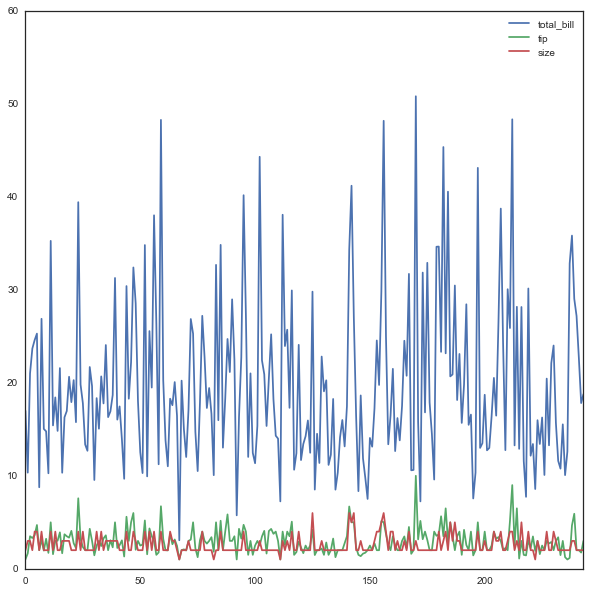

In [86]:
tips.plot(figsize=(10,10))

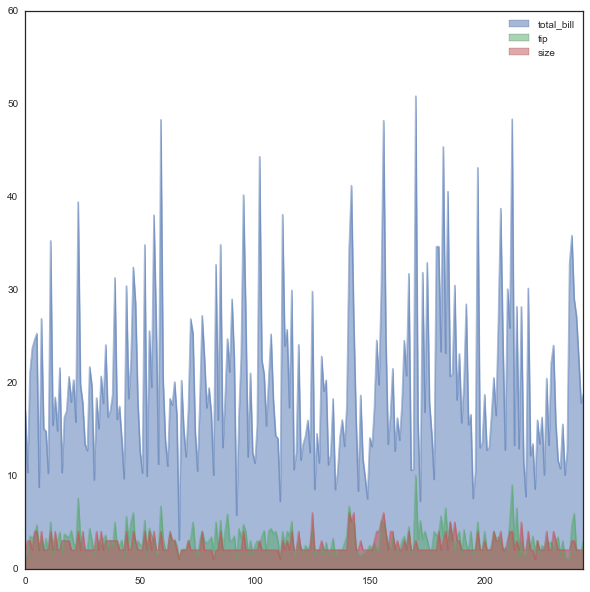

In [87]:
tips.plot(kind="area", figsize=(10,10), stacked=False)

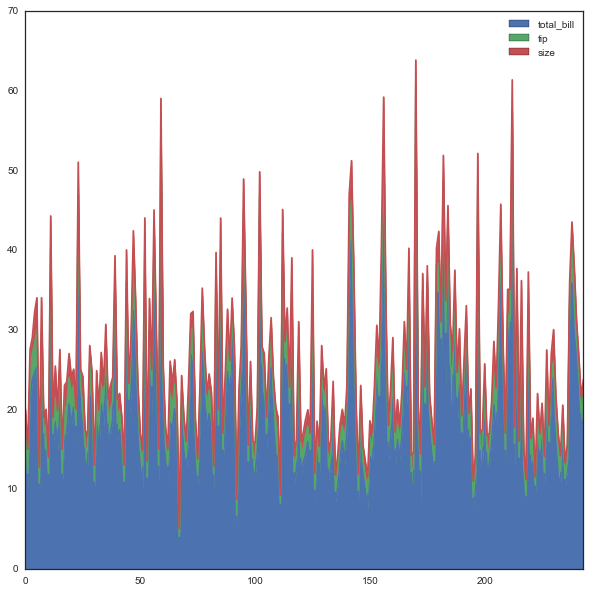

In [88]:
tips.plot(kind="area", figsize=(10,10), stacked=True)

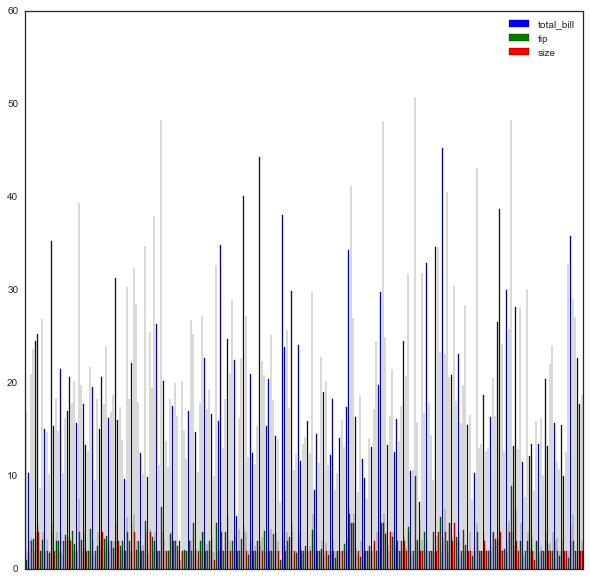

In [89]:
ax = tips.plot(kind="bar", figsize=(10,10), stacked=False)
ax.xaxis.set_major_formatter(plt.NullFormatter())

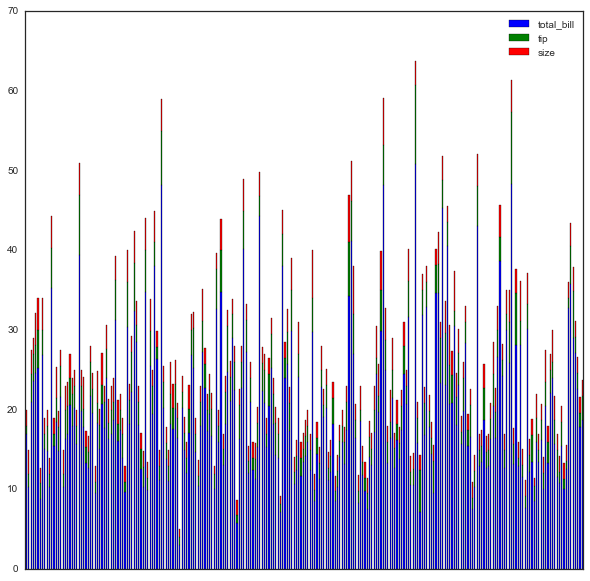

In [90]:
ax = tips.plot(kind="bar", figsize=(10,10), stacked=True)
ax.xaxis.set_major_formatter(plt.NullFormatter())

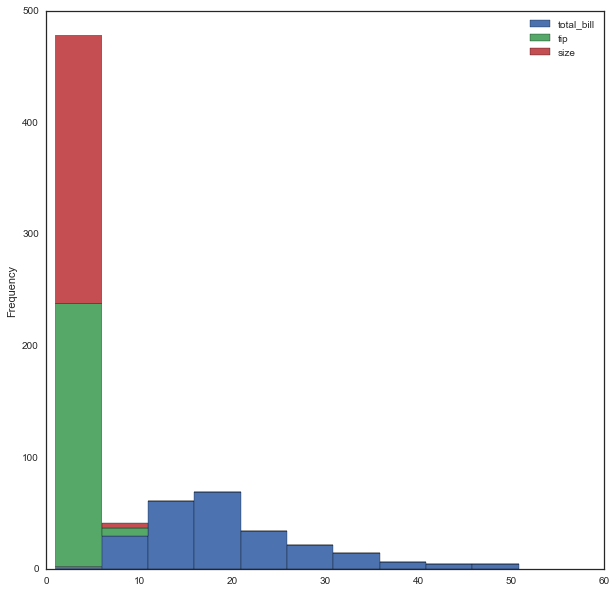

In [91]:
tips.plot(kind="hist", figsize=(10,10), stacked=True)

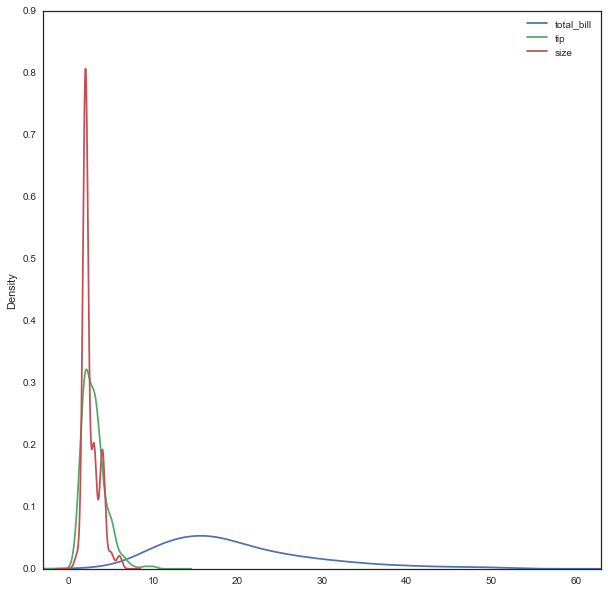

In [92]:
tips.plot(kind="kde", xlim=(-3,63), figsize=(10,10))

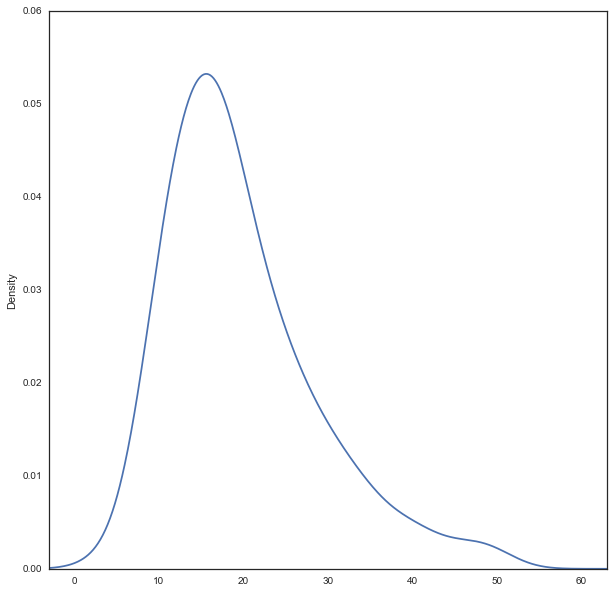

In [93]:
tips['total_bill'].plot.kde(xlim=(-3,63), figsize=(10,10))

<a id='2.1b'></a>
### 2.1b mtcars 

In [94]:
# Find numerical variables

cv_mtcars = ['Cars']
print set(mtcars.columns).difference(set(cv_mtcars))

set(['disp', 'drat', 'gear', 'wt', 'mpg', 'qsec', 'hp', 'am', 'vs', 'carb', 'cyl'])


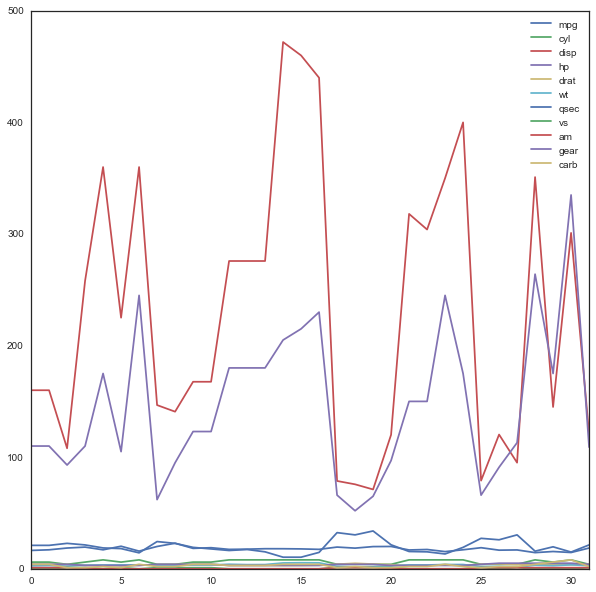

In [95]:
mtcars.plot(figsize=(10,10))

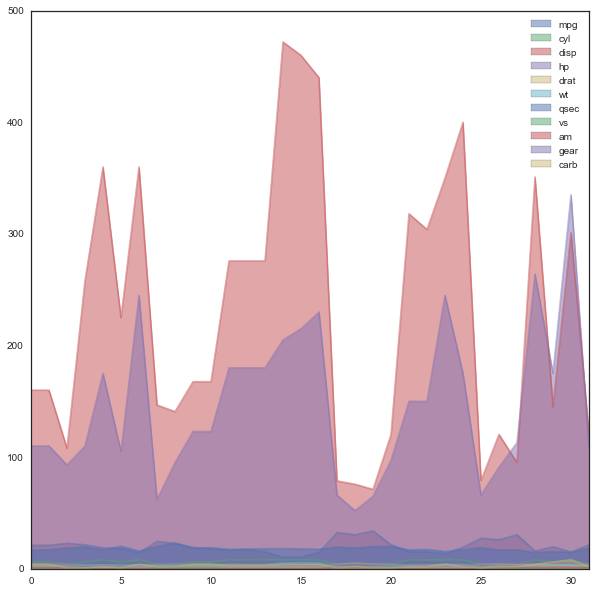

In [96]:
mtcars.plot(kind="area", figsize=(10,10), stacked=False)

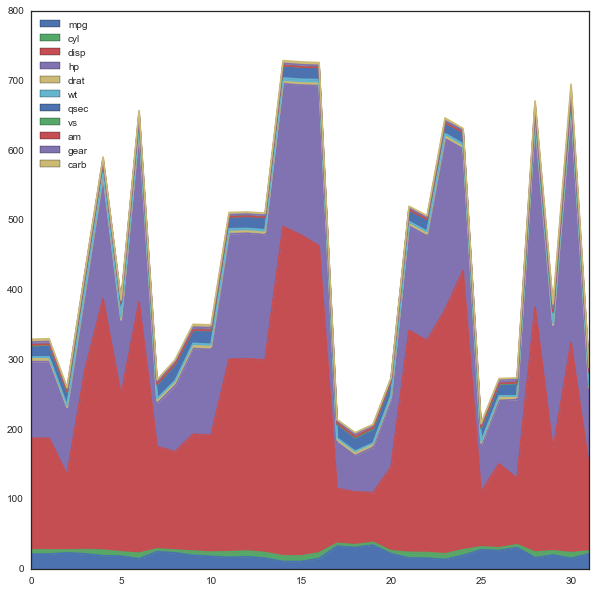

In [97]:
mtcars.plot(kind="area", figsize=(10,10), stacked=True)

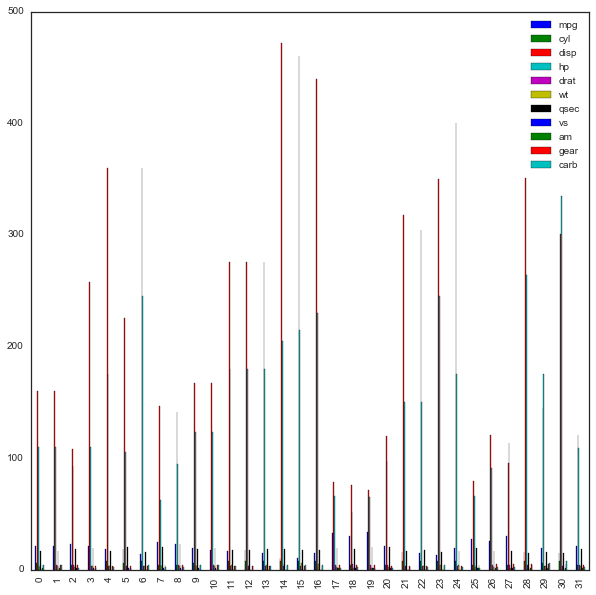

In [98]:
mtcars.plot(kind="bar", figsize=(10,10), stacked=False)

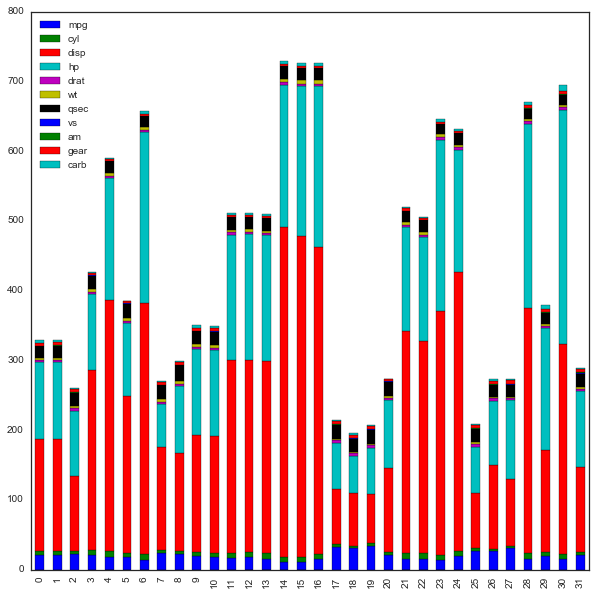

In [99]:
mtcars.plot(kind="bar", figsize=(10,10), stacked=True)

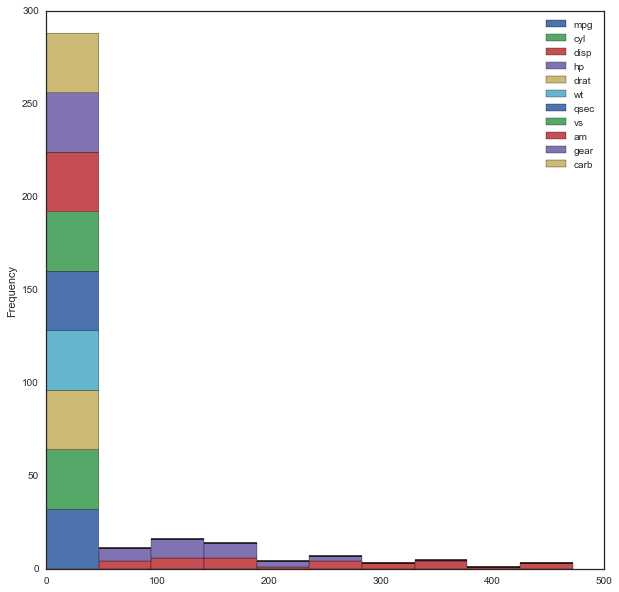

In [100]:
mtcars.plot(kind="hist", figsize=(10,10), stacked=True)

In [101]:
# mtcars.describe()

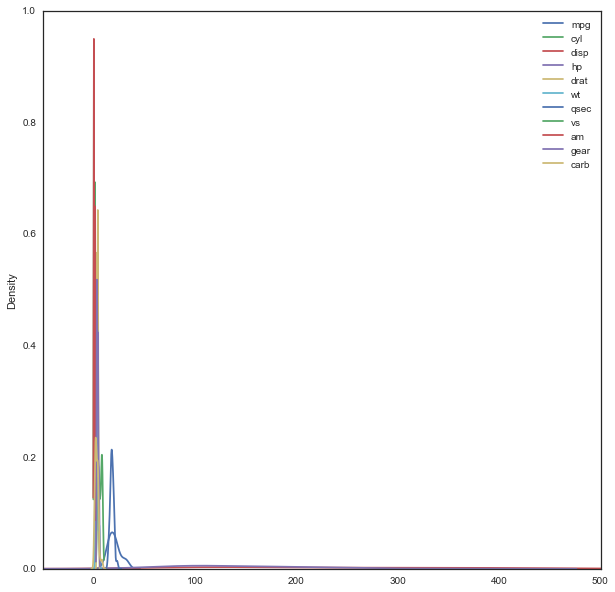

In [102]:
# mtcars.plot(kind="kde", figsize=(10,10)) 
mtcars.plot(kind="kde", xlim=(-50,501), figsize=(10,10))

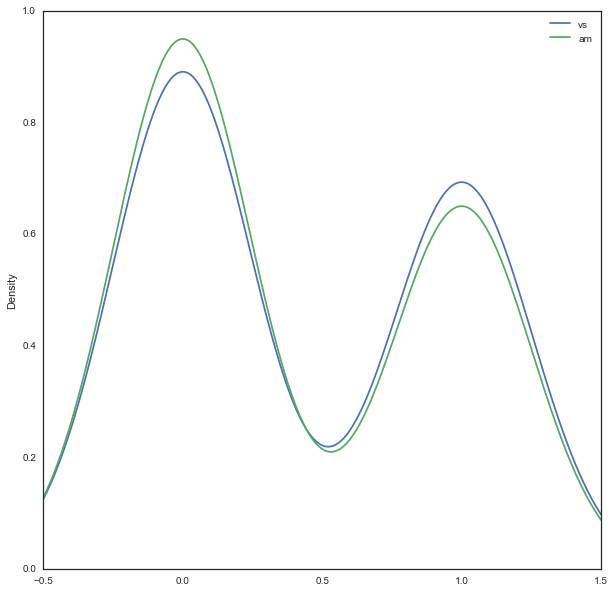

In [103]:
mtcars[['vs','am']].plot.kde(figsize=(10,10)) 

<a id='2.1c'></a>
### 2.1c diamonds 

In [104]:
# Find numerical variables

print set(diamonds.columns).difference(set(cv_diamonds))

set(['#', 'price', 'carat', 'depth', 'table', 'y', 'x', 'z'])


In [105]:
diamonds.drop('#',inplace=True,axis=1)

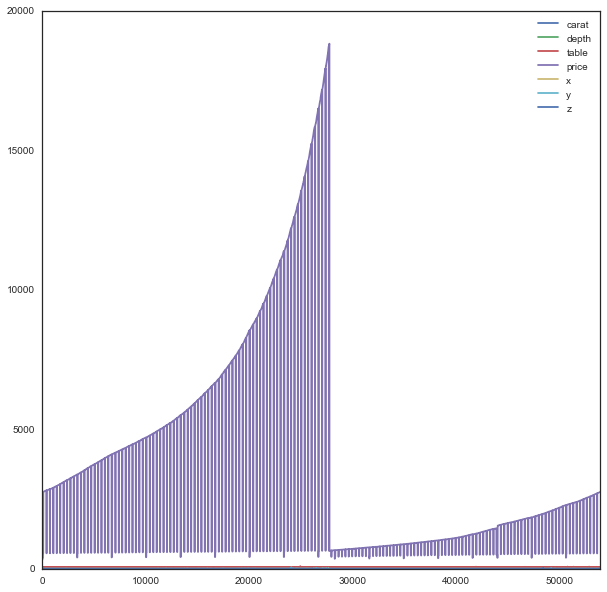

In [106]:
diamonds.plot(figsize=(10,10))

In [107]:
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

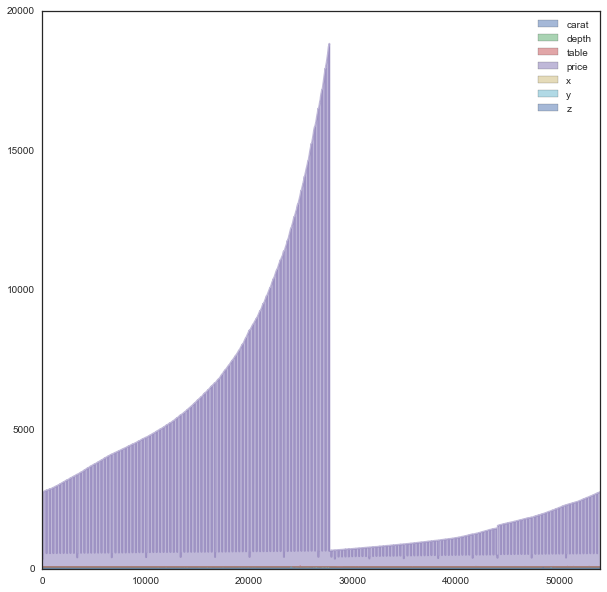

In [108]:
diamonds.plot(kind="area", figsize=(10,10), stacked=False)

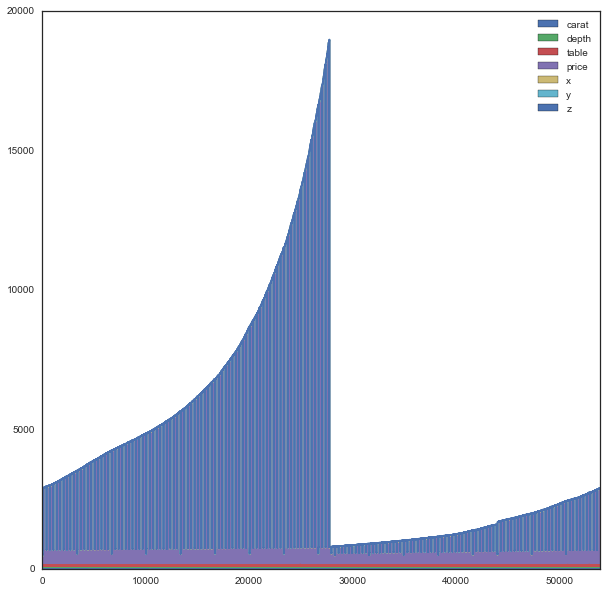

In [109]:
diamonds.plot(kind="area", figsize=(10,10), stacked=True)

In [110]:
diamonds_sample = diamonds.sample(100)

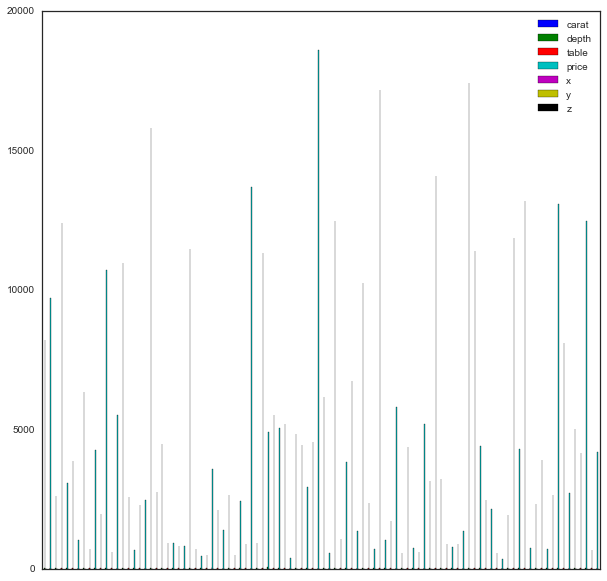

In [111]:
ax = diamonds_sample.plot(kind="bar", figsize=(10,10), stacked=False)
ax.xaxis.set_major_formatter(plt.NullFormatter())

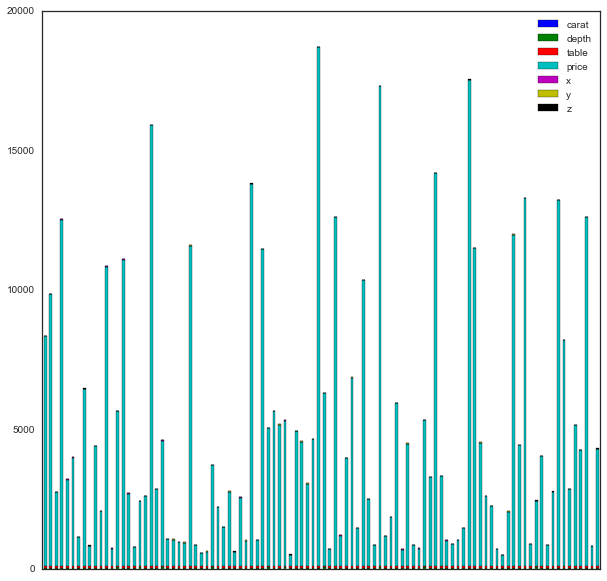

In [112]:
ax = diamonds_sample.plot(kind="bar", figsize=(10,10), stacked=True)
ax.xaxis.set_major_formatter(plt.NullFormatter())

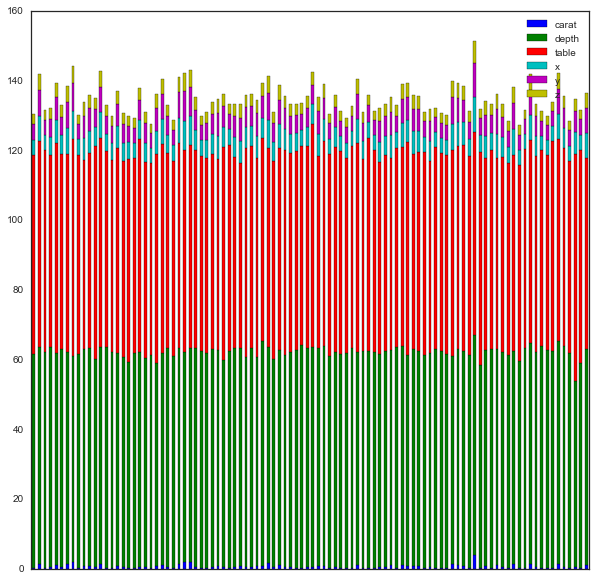

In [113]:
diamonds_sample1 = diamonds[['carat','depth','table','x','y','z']].sample(100)
ax = diamonds_sample1.plot(kind="bar", figsize=(10,10), stacked=True)
ax.xaxis.set_major_formatter(plt.NullFormatter())

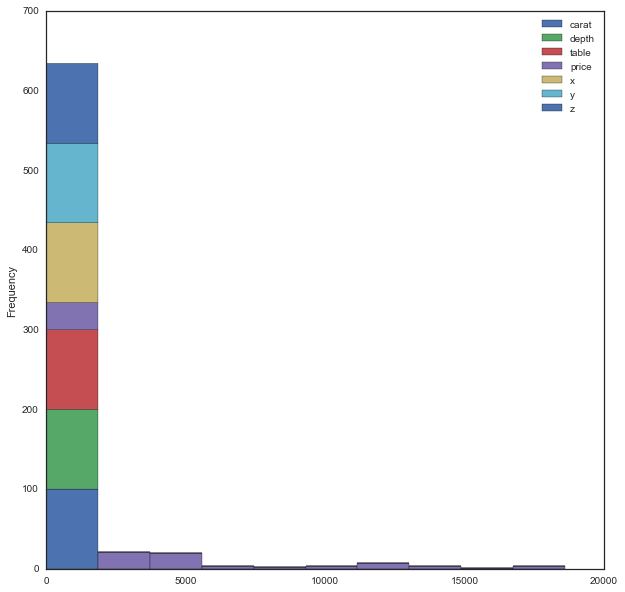

In [114]:
diamonds_sample.plot(kind="hist", figsize=(10,10), stacked=True)

In [115]:
diamonds_sample1.describe()

carat       depth       table          x           y           z
count  100.000000  100.000000  100.000000  100.00000  100.000000  100.000000
mean     0.806800   61.605000   57.480000    5.72650    5.735500    3.529400
std      0.560757    1.493851    2.129542    1.18667    1.179004    0.728908
min      0.300000   53.400000   53.000000    4.26000    4.230000    2.620000
25%      0.375000   61.000000   56.000000    4.63250    4.687500    2.807500
50%      0.700000   61.750000   57.000000    5.62500    5.665000    3.480000
75%      1.022500   62.500000   59.000000    6.49250    6.470000    4.012500
max      4.000000   64.700000   65.000000   10.01000    9.940000    6.310000

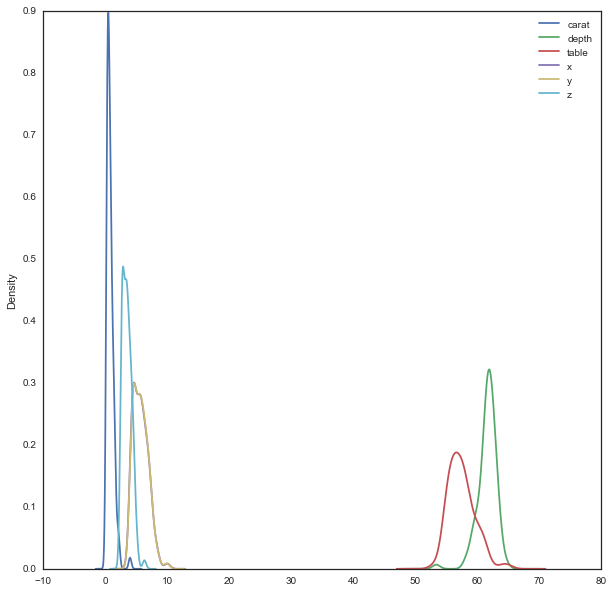

In [116]:
diamonds_sample1.plot(kind="kde", figsize=(10,10)) 
# diamonds_sample1.plot(kind="kde", xlim=(-50,501), figsize=(10,10))

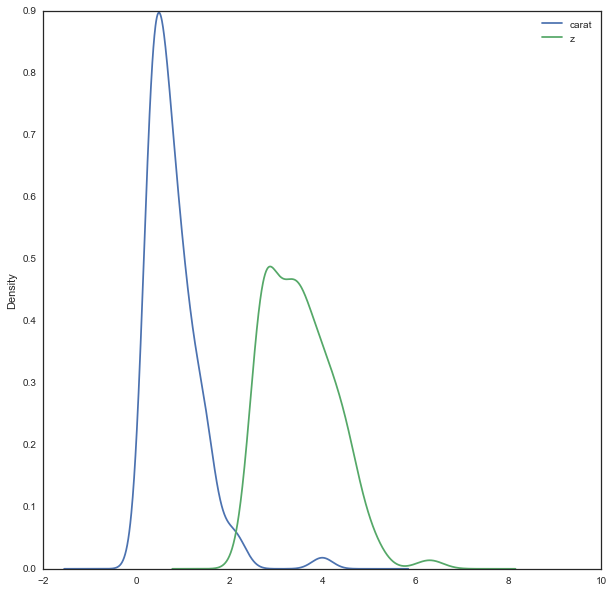

In [117]:
diamonds_sample1[['carat','z']].plot.kde(figsize=(10,10)) 

<a id='2.2'></a>
## 2.2 Σχεδιαγράμματα Συμπτώσεων Δυο Μεταβλητών

<a id='2.2a'></a>
### 2.2a tips

In [118]:
print ld_tips
cv_tips

{'Unnamed: 0': 244, 'tip': 123, 'smoker': 2, 'sex': 2, 'total_bill': 229, 'time': 2, 'day': 4, 'size': 6}


['sex', 'smoker', 'day', 'time']

In [119]:
pd.crosstab(tips.day, tips.time)

time  Dinner  Lunch
day                
Fri       12      7
Sat       87      0
Sun       76      0
Thur       1     61

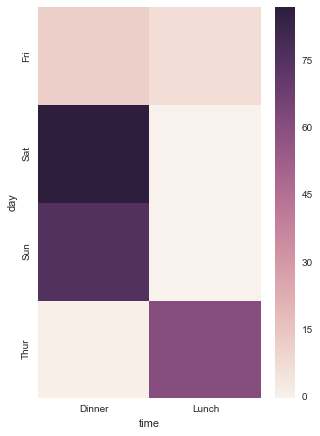

In [120]:
plt.figure(figsize=(5,7))
sns.heatmap(pd.crosstab(tips.day, tips.time))

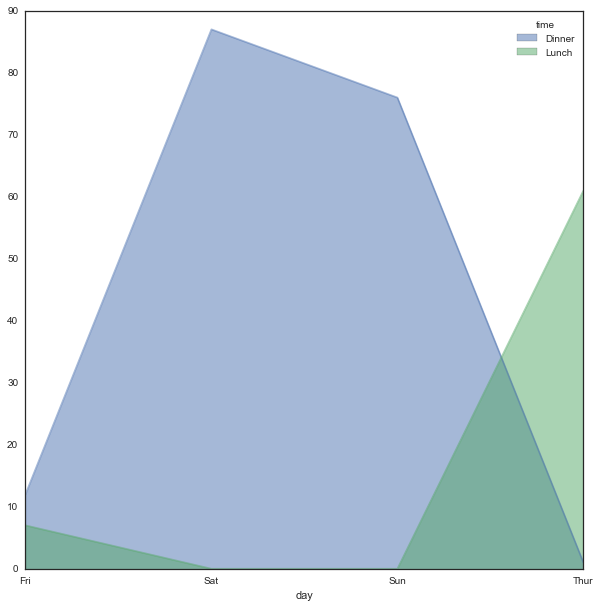

In [121]:
pd.crosstab(tips.day, tips.time).plot(kind="area", figsize=(10,10), stacked=False)

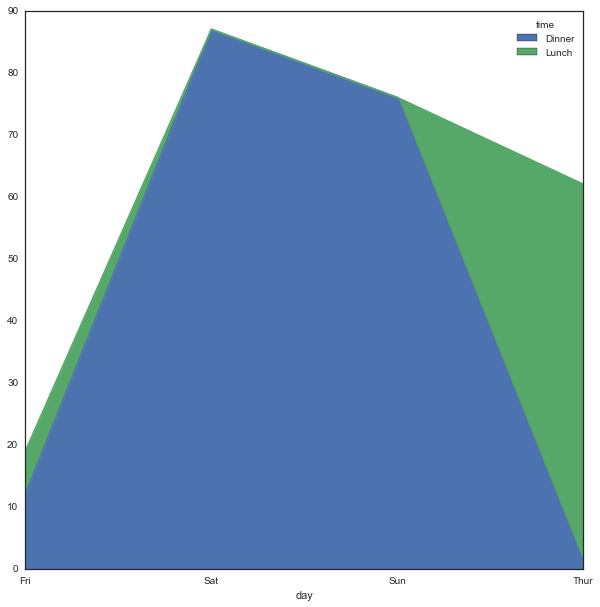

In [122]:
pd.crosstab(tips.day, tips.time).plot(kind="area", figsize=(10,10), stacked=True)

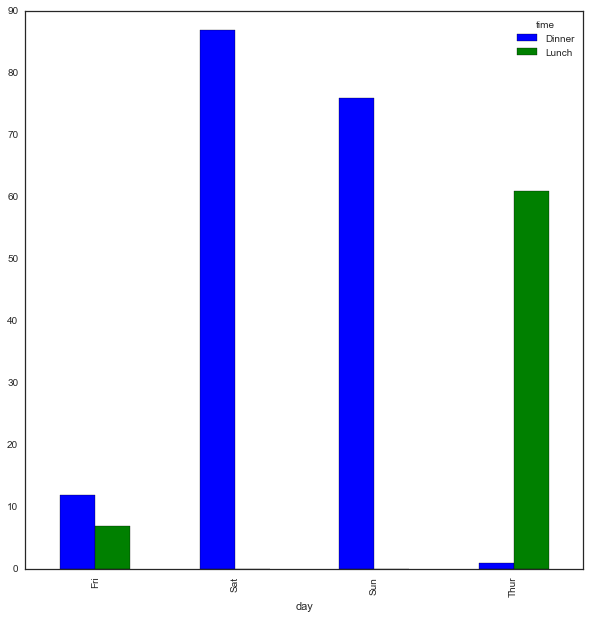

In [123]:
pd.crosstab(tips.day, tips.time).plot(kind="bar", figsize=(10,10), stacked=False)

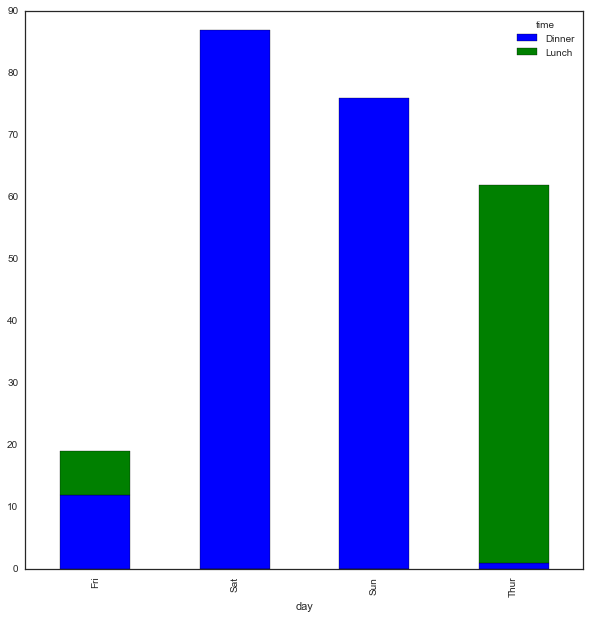

In [124]:
pd.crosstab(tips.day, tips.time).plot(kind="bar", figsize=(10,10), stacked=True)

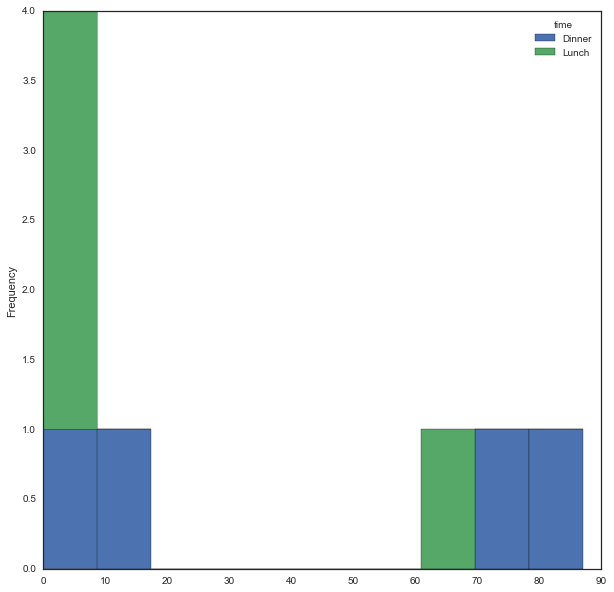

In [125]:
pd.crosstab(tips.day, tips.time).plot(kind="hist", figsize=(10,10), stacked=True)

<a id='2.2b'></a>
### 2.2b mtcars

In [126]:
print ld_mtcars
cv_mtcars

{'disp': 27, 'drat': 22, 'gear': 3, 'mpg': 25, 'qsec': 30, 'Cars': 32, 'hp': 22, 'vs': 2, 'wt': 29, 'am': 2, 'carb': 6, 'cyl': 3}


['Cars']

In [127]:
pd.crosstab(mtcars.cyl,mtcars.gear)

gear   3  4  5
cyl           
4      1  8  2
6      2  4  1
8     12  0  2

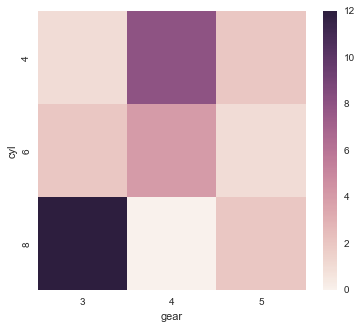

In [128]:
plt.figure(figsize=(6,5))
sns.heatmap(pd.crosstab(mtcars.cyl,mtcars.gear))

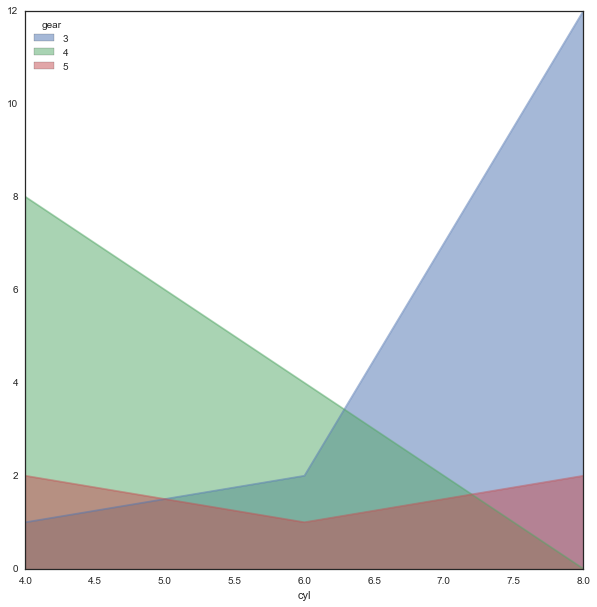

In [129]:
pd.crosstab(mtcars.cyl,mtcars.gear).plot(kind="area", figsize=(10,10), stacked=False)

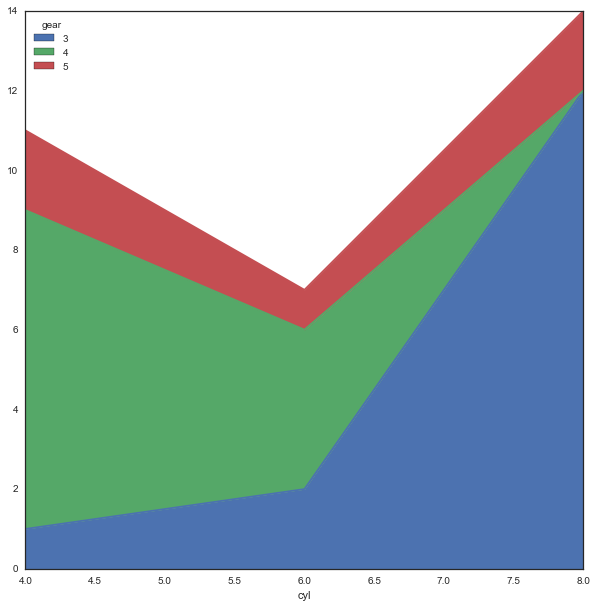

In [130]:
pd.crosstab(mtcars.cyl,mtcars.gear).plot(kind="area", figsize=(10,10), stacked=True)

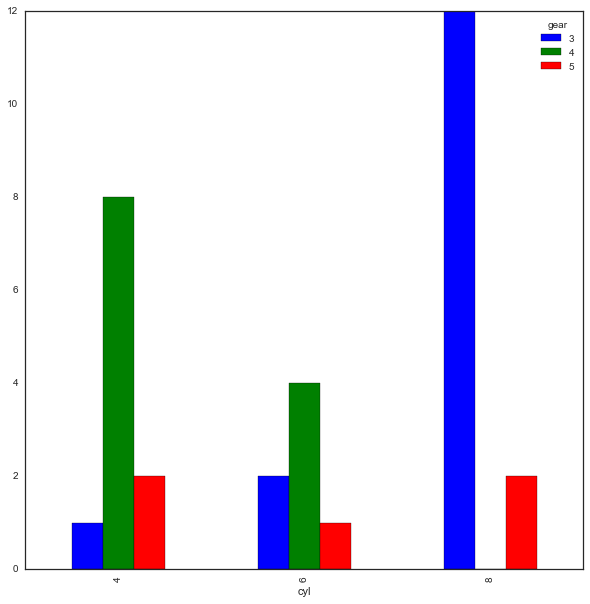

In [131]:
pd.crosstab(mtcars.cyl,mtcars.gear).plot(kind="bar", figsize=(10,10), stacked=False)

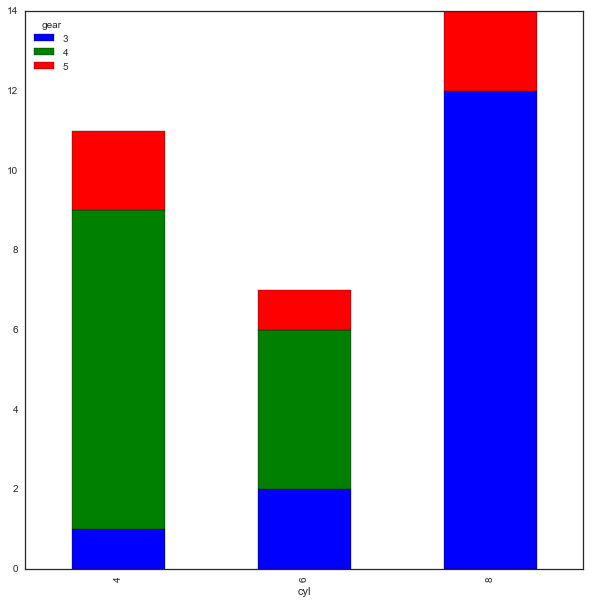

In [132]:
pd.crosstab(mtcars.cyl,mtcars.gear).plot(kind="bar", figsize=(10,10), stacked=True)

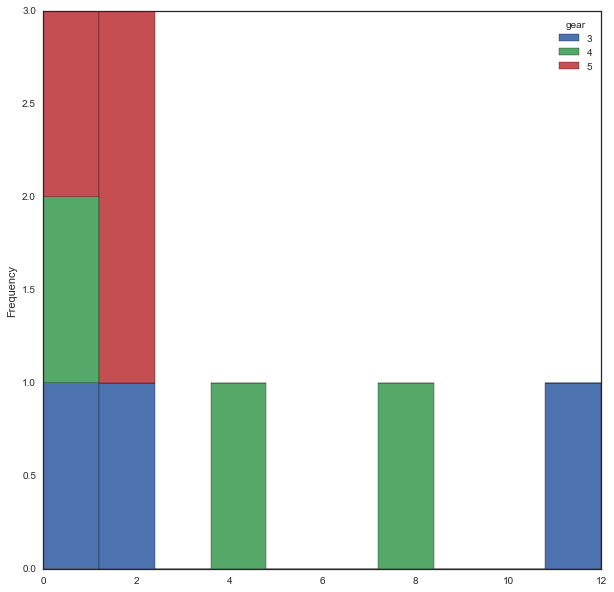

In [133]:
pd.crosstab(mtcars.cyl,mtcars.gear).plot(kind="hist", figsize=(10,10), stacked=True)

<a id='2.2c'></a>
### 2.2c diamonds

In [134]:
print ld_diamonds
cv_diamonds

{'#': 53940, 'cut': 5, 'color': 7, 'price': 11602, 'z': 375, 'carat': 273, 'depth': 184, 'x': 554, 'y': 552, 'table': 127, 'clarity': 8}


['cut', 'color', 'clarity']

In [135]:
pd.crosstab(diamonds.clarity,diamonds.color)

color       D     E     F     G     H     I    J
clarity                                         
I1         42   102   143   150   162    92   50
IF         73   158   385   681   299   143   51
SI1      2083  2426  2131  1976  2275  1424  750
SI2      1370  1713  1609  1548  1563   912  479
VS1       705  1281  1364  2148  1169   962  542
VS2      1697  2470  2201  2347  1643  1169  731
VVS1      252   656   734   999   585   355   74
VVS2      553   991   975  1443   608   365  131

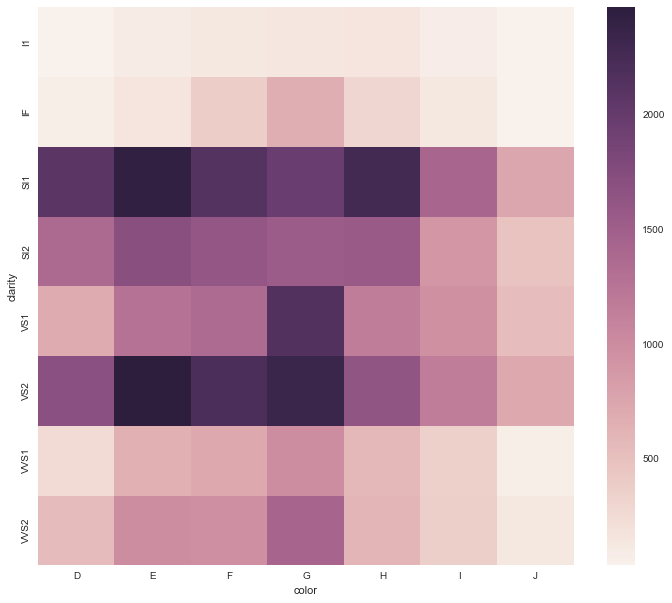

In [136]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.crosstab(diamonds.clarity,diamonds.color))

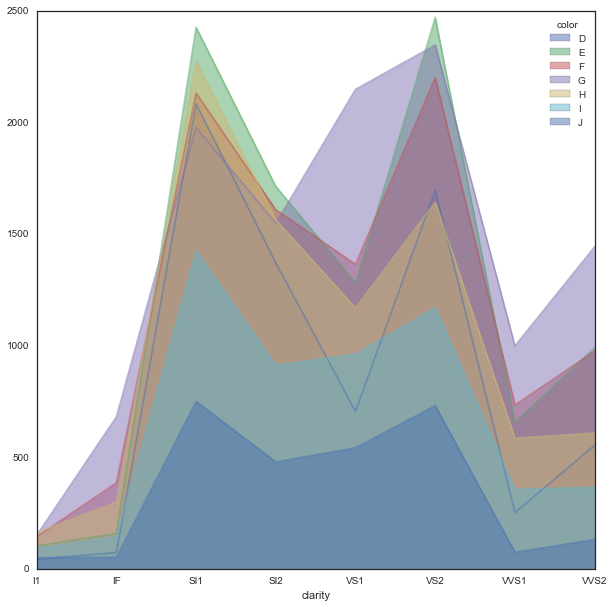

In [137]:
pd.crosstab(diamonds.clarity,diamonds.color).plot(kind="area", figsize=(10,10), stacked=False) 

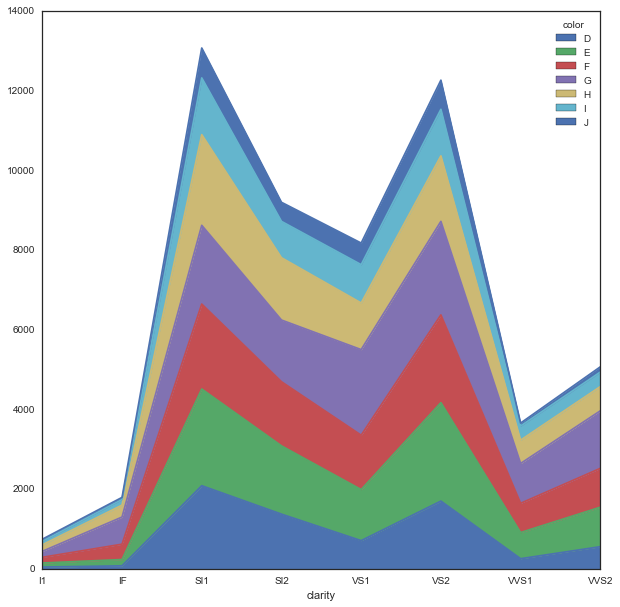

In [138]:
pd.crosstab(diamonds.clarity,diamonds.color).plot(kind="area", figsize=(10,10), stacked=True) 

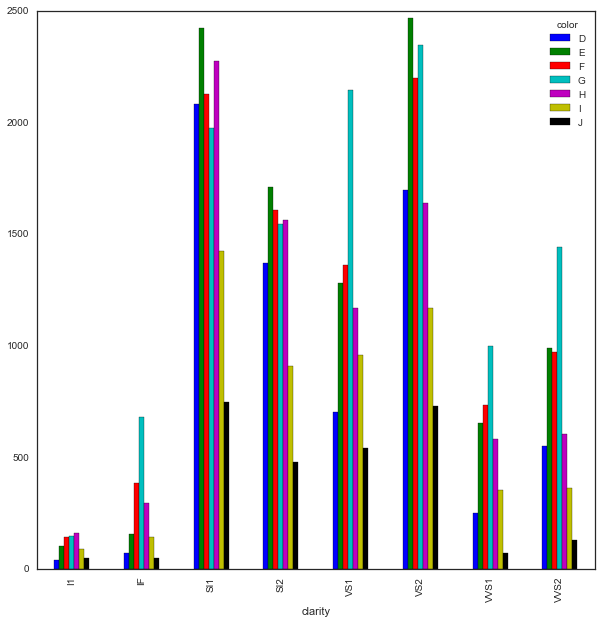

In [139]:
pd.crosstab(diamonds.clarity,diamonds.color).plot(kind="bar", figsize=(10,10), stacked=False) 

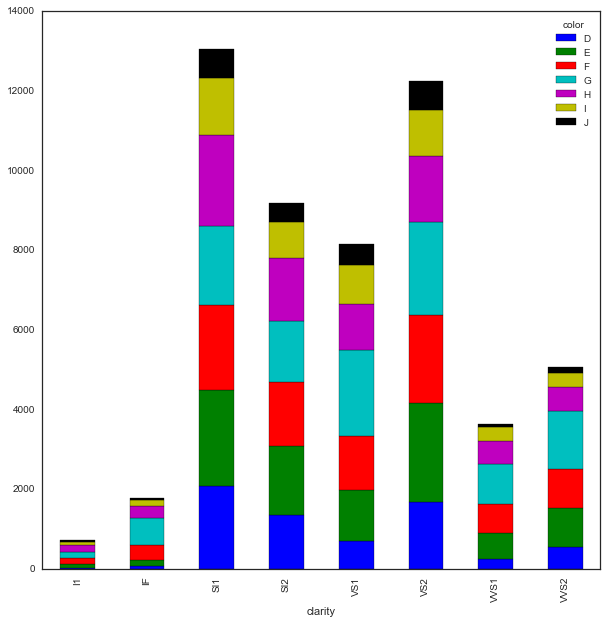

In [140]:
pd.crosstab(diamonds.clarity,diamonds.color).plot(kind="bar", figsize=(10,10), stacked=True) 

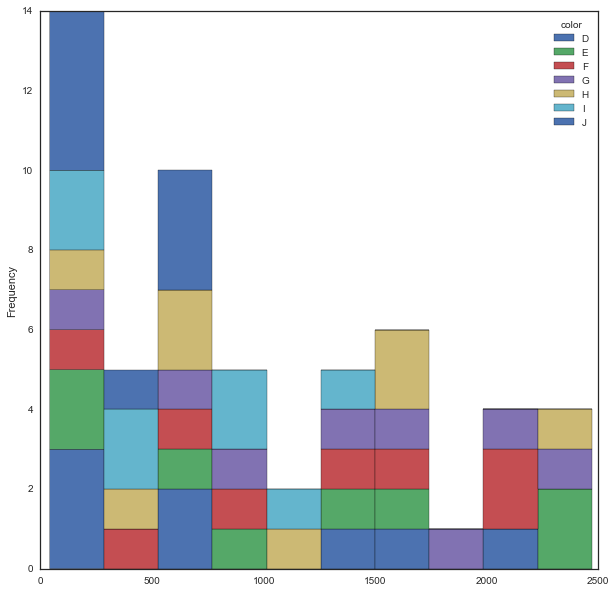

In [141]:
pd.crosstab(diamonds.clarity,diamonds.color).plot(kind="hist", figsize=(10,10), stacked=True) 

<a id='2.3'></a>
## 2.3 Διαγράμματα Διασποράς

<a id='2.3a'></a>
### 2.3a df

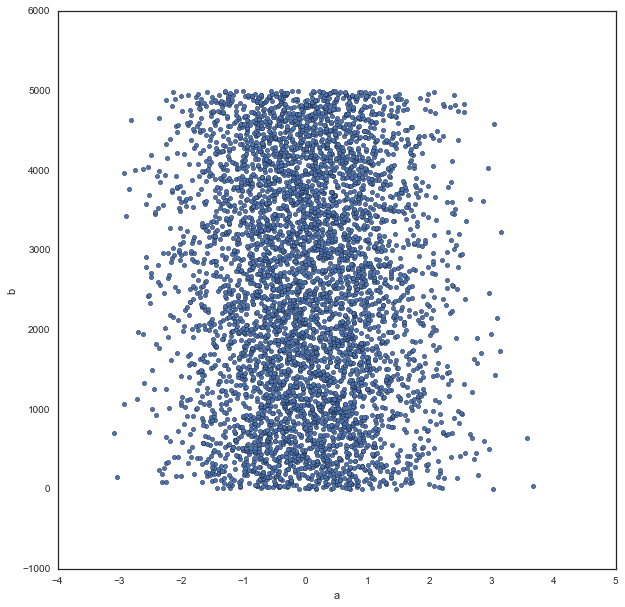

In [142]:
df = pd.DataFrame(np.random.randn(5000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(5000)
df.plot.scatter(x='a', y='b', figsize=(10,10))

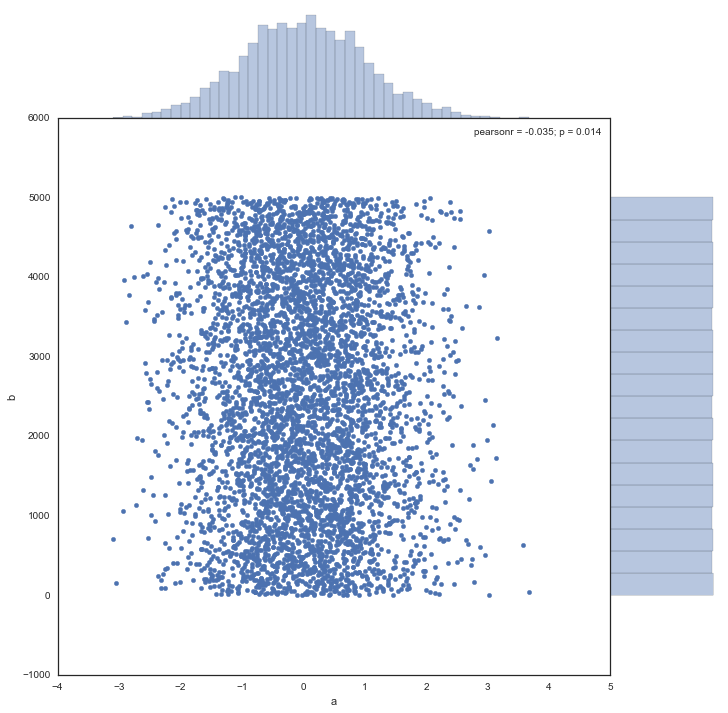

In [143]:
sns.jointplot(x="a", y="b", data=df, space=0, size=10)

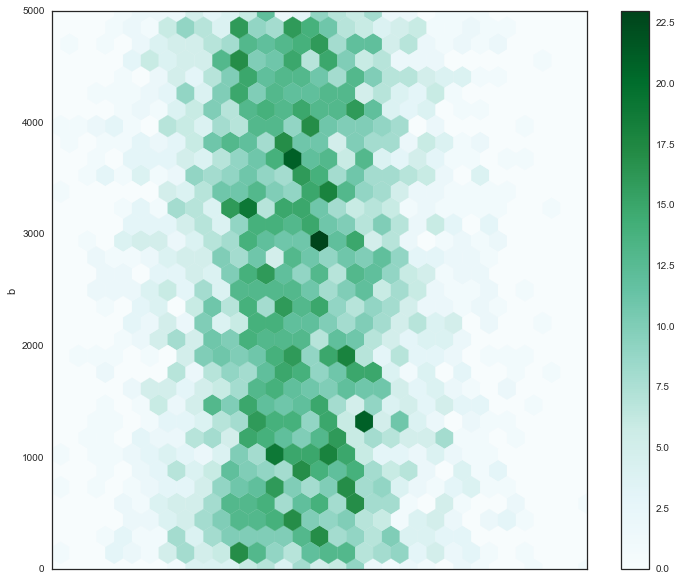

In [144]:
df.plot.hexbin(x='a', y='b', gridsize=30, figsize=(12,10))

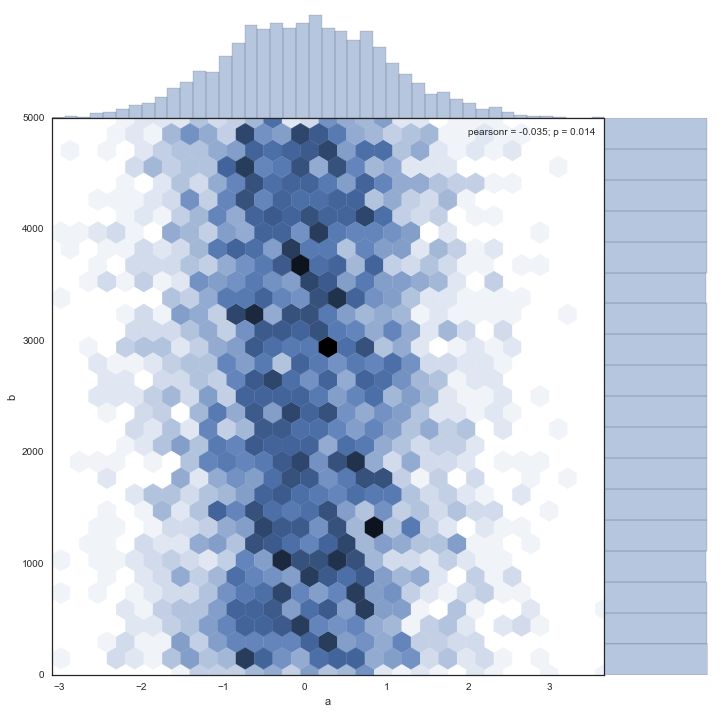

In [145]:
sns.jointplot("a", "b", data=df, kind="hex", gridsize=30, space=0, size=10)

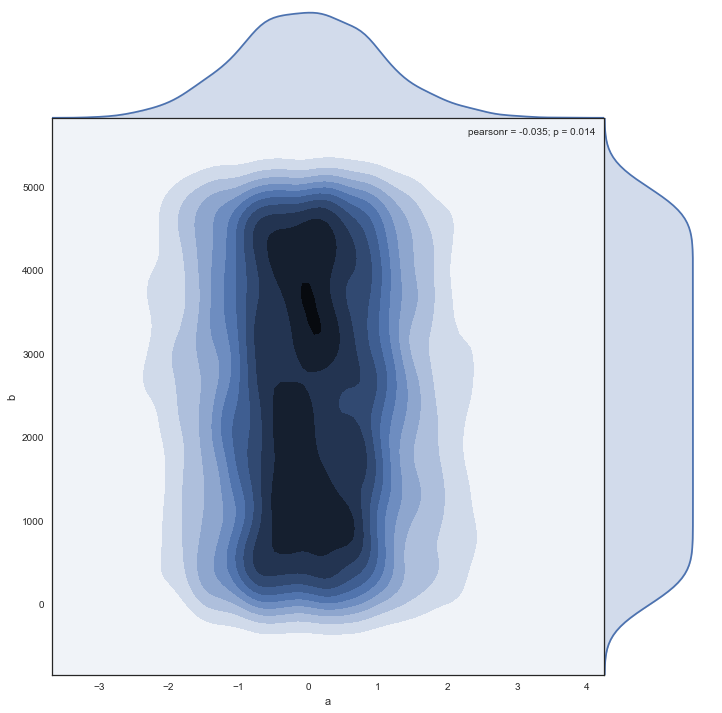

In [146]:
sns.jointplot("a", "b", data=df, kind="kde", space=0, size=10)

<a id='2.3b'></a>
### 2.3b tips 

In [147]:
# Find numerical variables

print set(tips.columns).difference(set(cv_tips))
ld_tips

set(['total_bill', 'tip', 'size'])


{'Unnamed: 0': 244,
 'day': 4,
 'sex': 2,
 'size': 6,
 'smoker': 2,
 'time': 2,
 'tip': 123,
 'total_bill': 229}

In [148]:
for i in tips.columns:
    print i, len(tips[i].unique())
tips.head(5)

total_bill 229
tip 123
sex 2
smoker 2
day 4
time 2
size 6


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

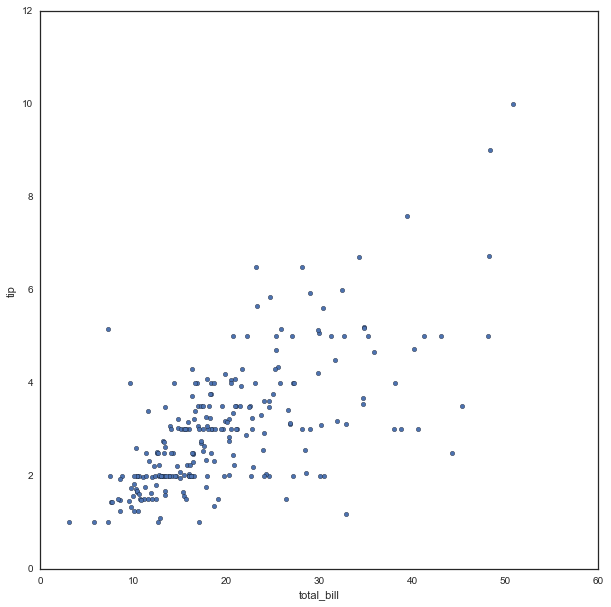

In [149]:
tips.plot.scatter(x='total_bill',y='tip',figsize=(10,10))

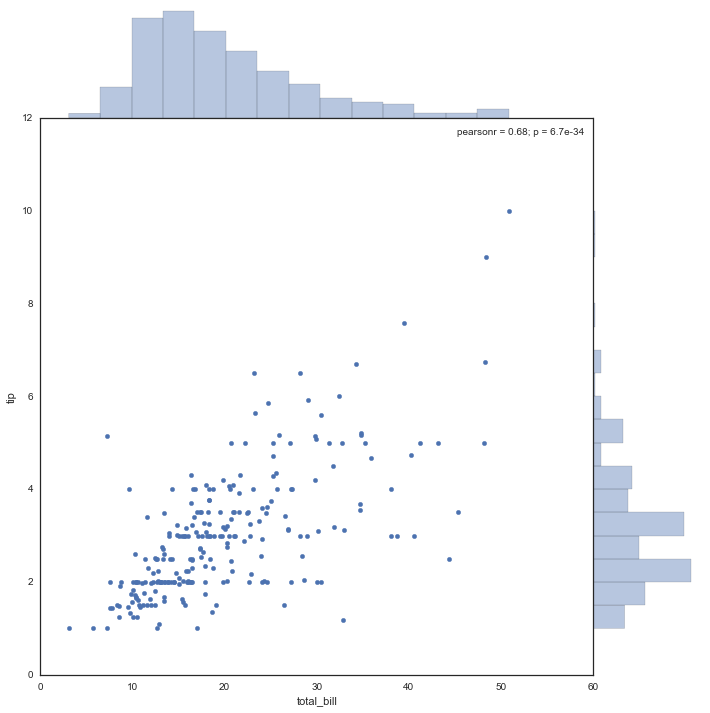

In [150]:
sns.jointplot(x="total_bill", y="tip", data=tips, space=0, size=10)

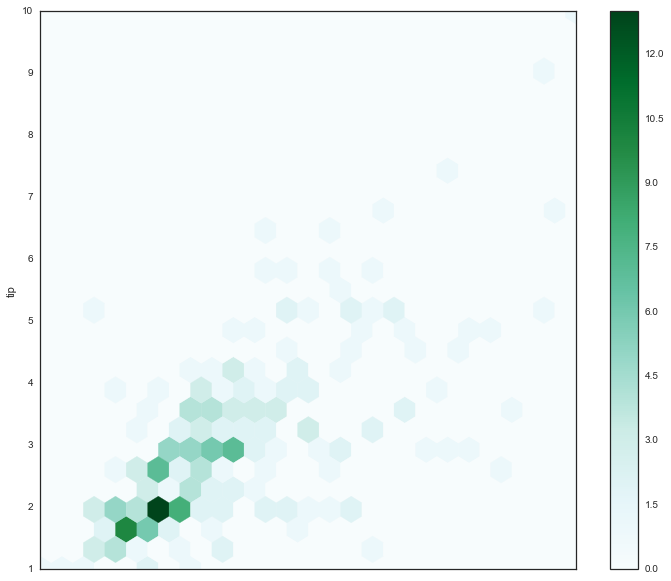

In [151]:
tips.plot.hexbin(x='total_bill', y='tip', gridsize=25, figsize=(12,10))

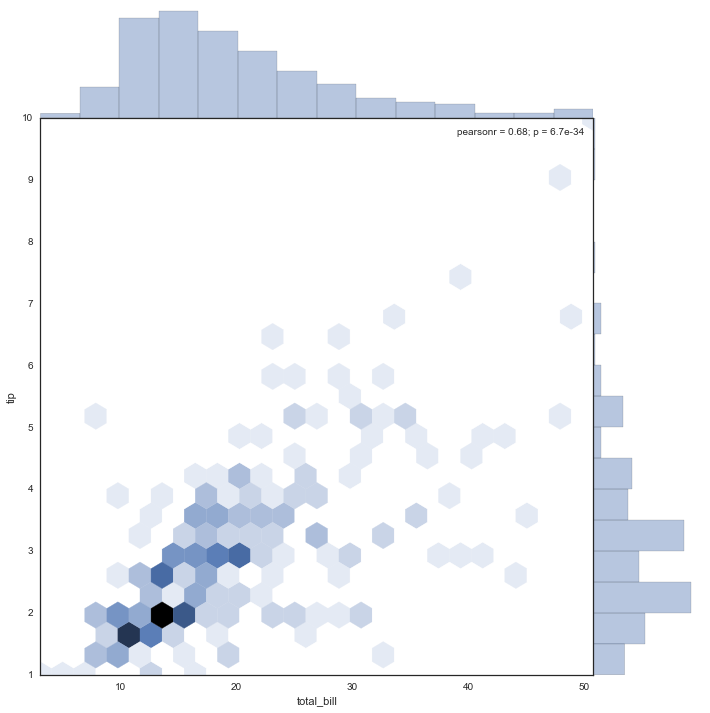

In [152]:
sns.jointplot("total_bill", "tip", data=tips, kind="hex", gridsize=25, space=0, size=10)

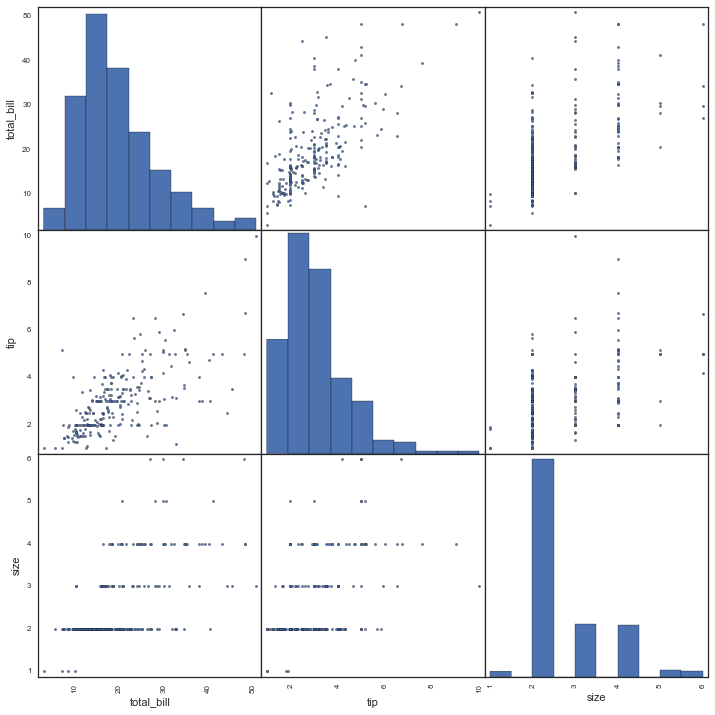

In [153]:
sss=scatter_matrix(tips[['total_bill','tip','size']], alpha=0.9, figsize=(12, 12), color='black', diagonal='hist')

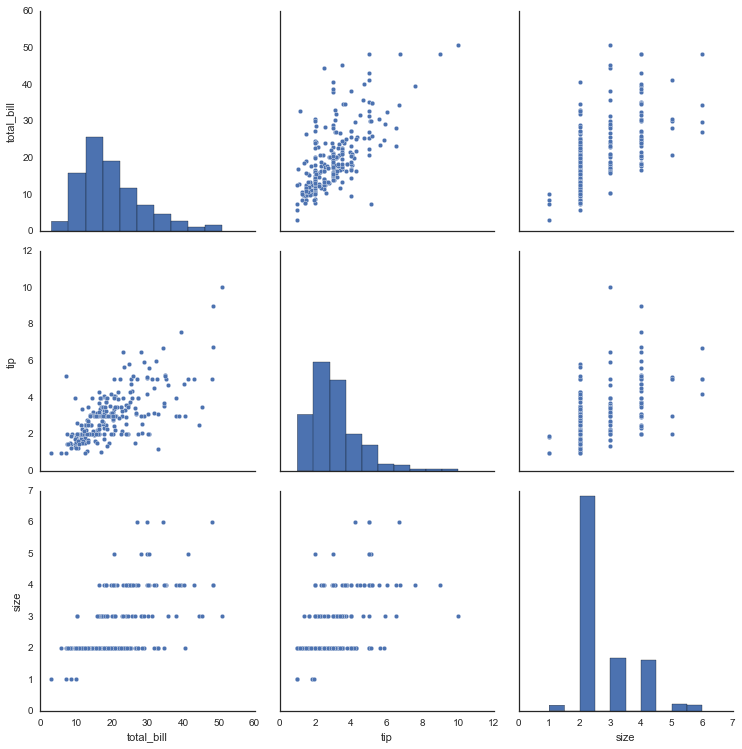

In [154]:
sns.pairplot(tips[['total_bill','tip','size']],kind='scatter',diag_kind='hist',size=3.5)

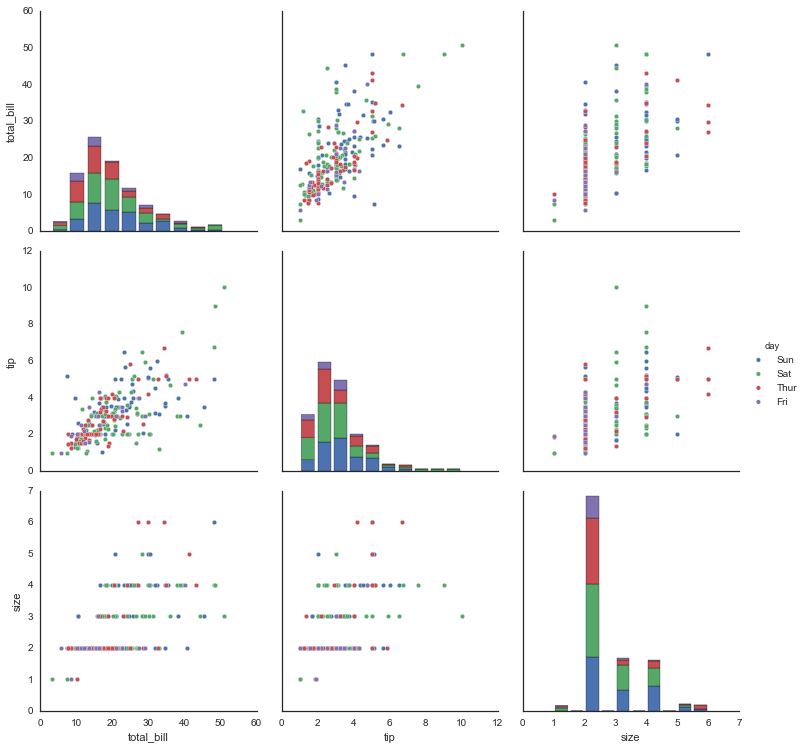

In [155]:
sns.pairplot(tips, hue="day", size=3.5)

<a id='2.3c'></a>
### 2.3c mtcars 

In [156]:
# Find numerical variables

print set(mtcars.columns).difference(set(cv_mtcars))
ld_mtcars

set(['disp', 'drat', 'gear', 'wt', 'mpg', 'qsec', 'hp', 'am', 'vs', 'carb', 'cyl'])


{'Cars': 32,
 'am': 2,
 'carb': 6,
 'cyl': 3,
 'disp': 27,
 'drat': 22,
 'gear': 3,
 'hp': 22,
 'mpg': 25,
 'qsec': 30,
 'vs': 2,
 'wt': 29}

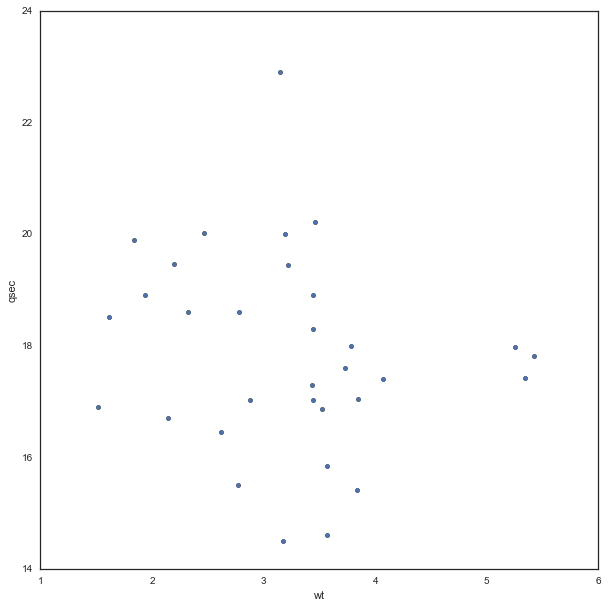

In [157]:
mtcars.plot.scatter(x='wt',y='qsec',figsize=(10,10))

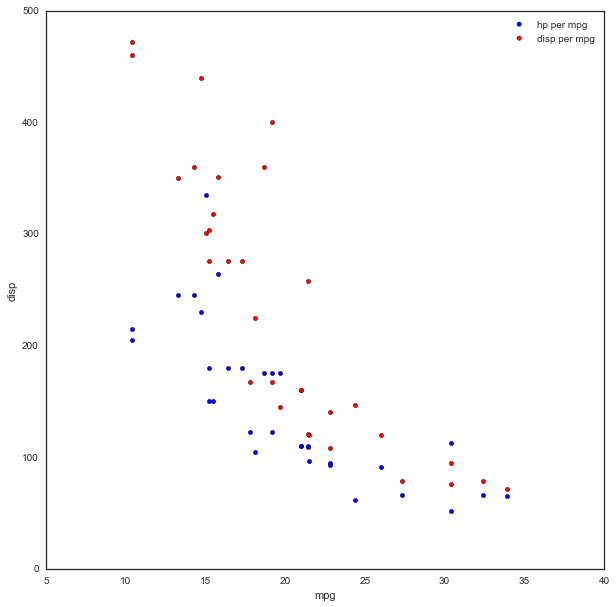

In [158]:
ax=mtcars.plot.scatter(x='mpg',y='hp',label='hp per mpg',figsize=(10,10),color='blue')
mtcars.plot.scatter(x='mpg',y='disp',label='disp per mpg',figsize=(10,10),ax=ax,color='red')

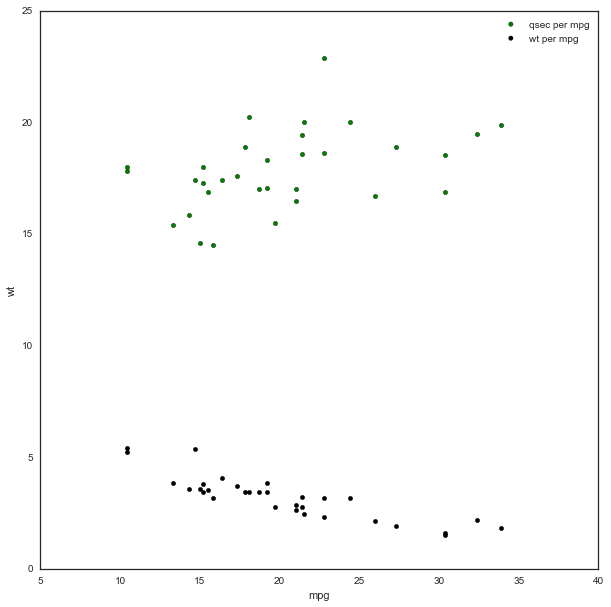

In [159]:
ax=mtcars.plot.scatter(x='mpg',y='qsec',label='qsec per mpg',figsize=(10,10),color='green')
mtcars.plot.scatter(x='mpg',y='wt',label='wt per mpg',figsize=(10,10),ax=ax,color='black')

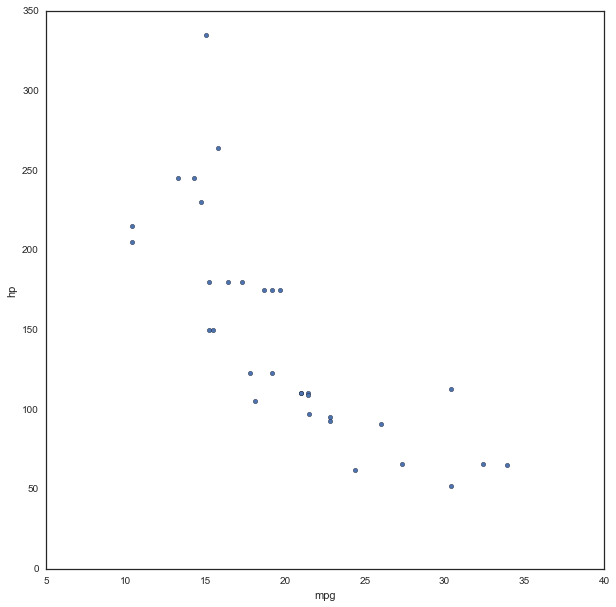

In [160]:
mtcars.plot.scatter(x='mpg',y='hp', figsize=(10,10))

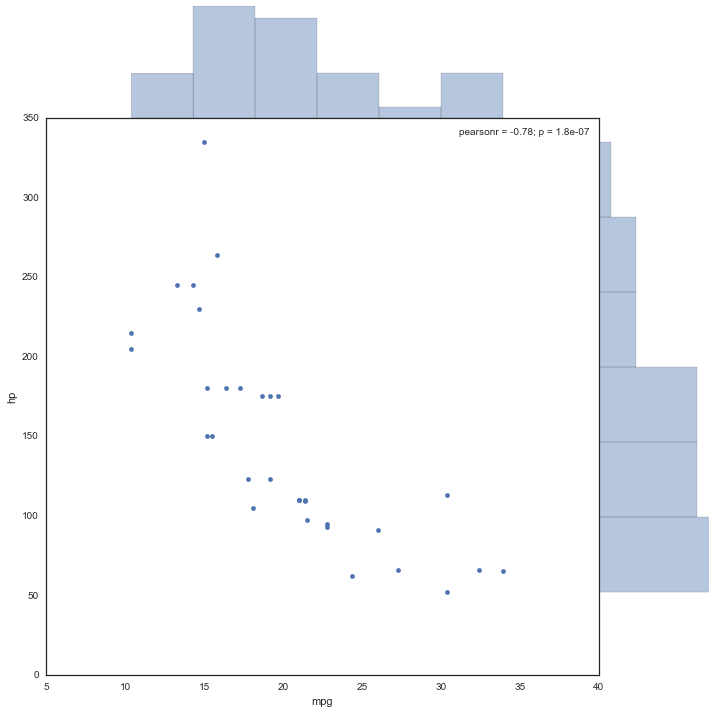

In [161]:
sns.jointplot(x="mpg", y="hp", data=mtcars, space=0, size=10)

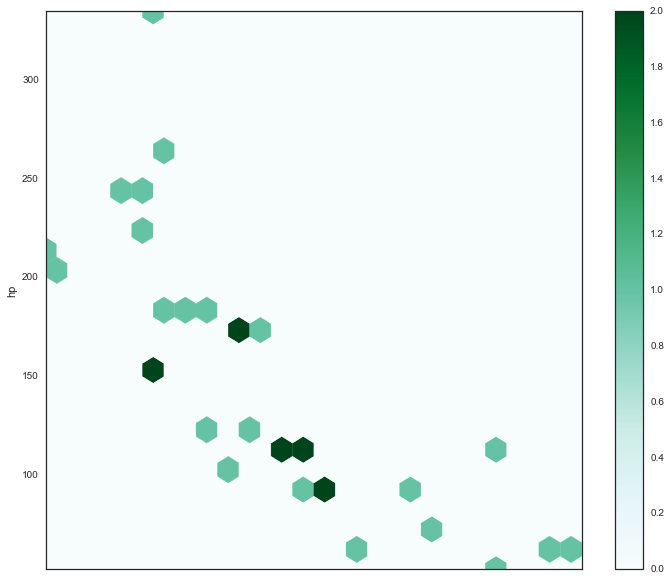

In [162]:
mtcars.plot.hexbin(x='mpg', y='hp', gridsize=25, figsize=(12,10))

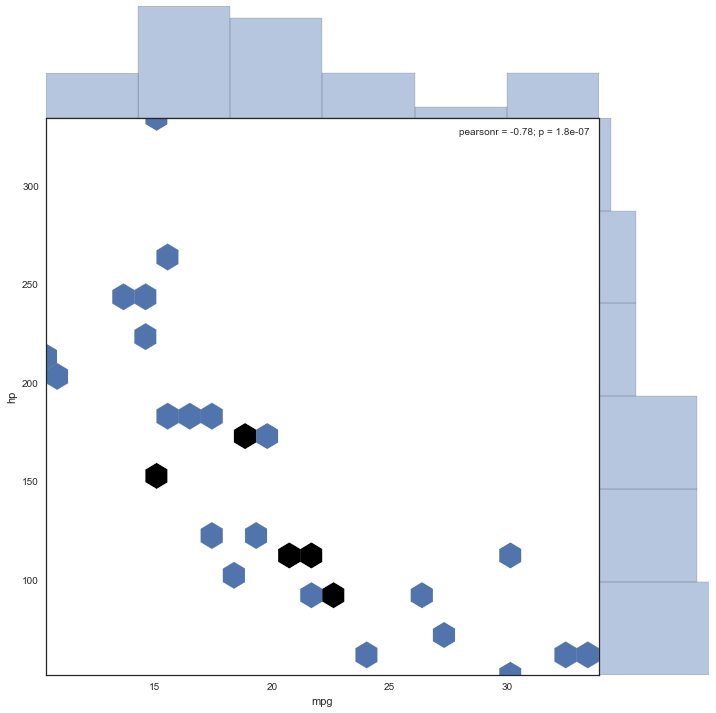

In [163]:
sns.jointplot("mpg", "hp", data=mtcars, kind="hex", gridsize=25, space=0, size=10)

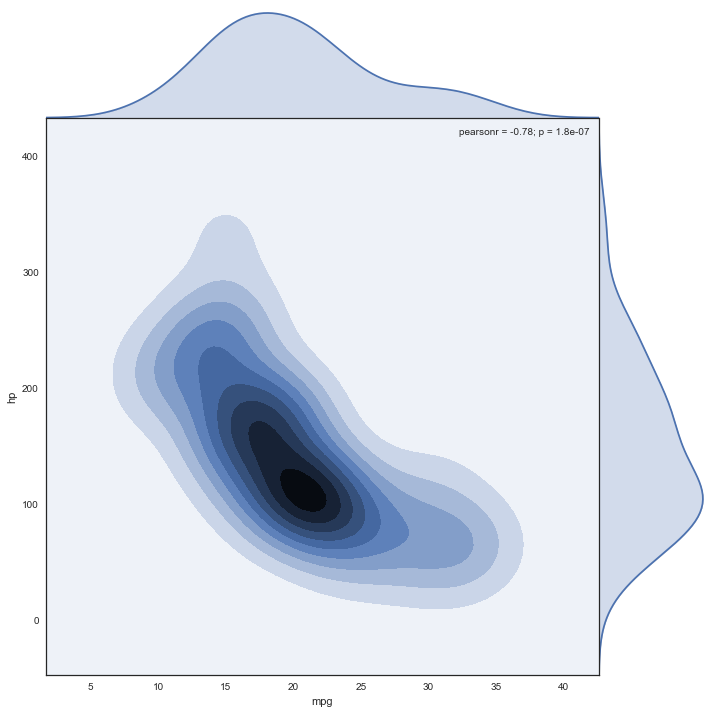

In [164]:
sns.jointplot("mpg", "hp", data=mtcars, kind="kde", space=0, size=10)

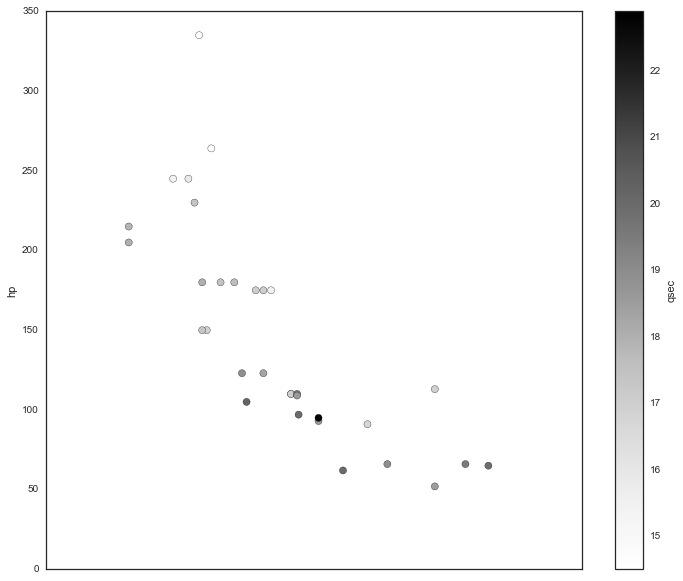

In [165]:
mtcars.plot.scatter(x='mpg', y='hp', c='qsec', s=50, figsize=(12,10))

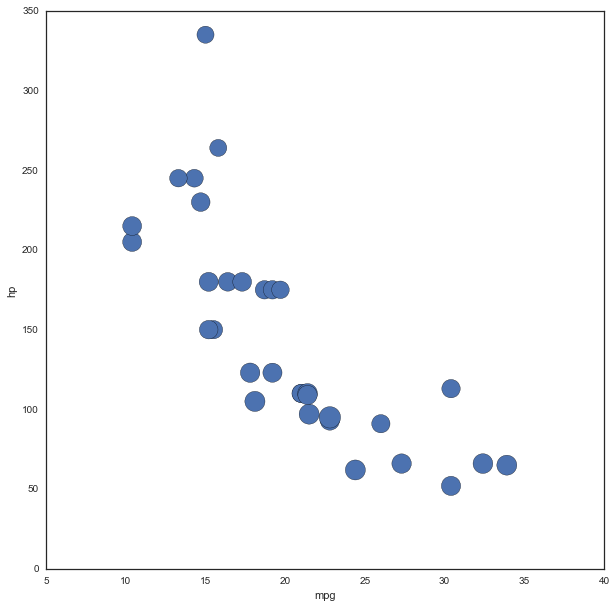

In [166]:
mtcars.plot.scatter(x='mpg', y='hp', s=mtcars['qsec']*20, figsize=(10,10))

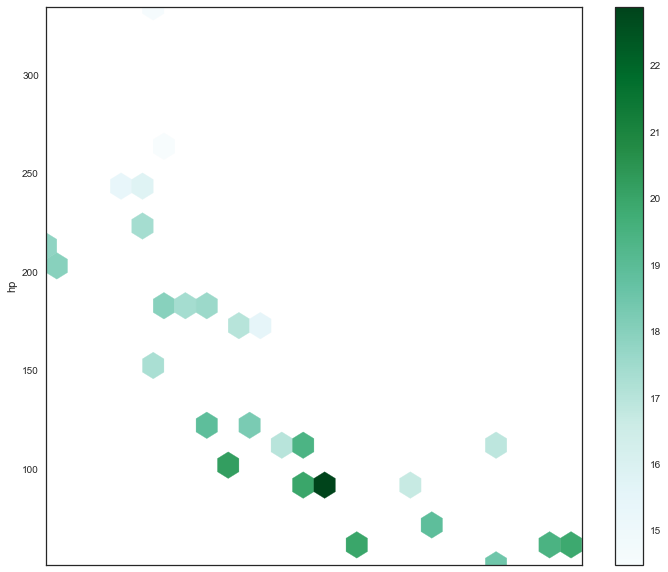

In [167]:
mtcars.plot.hexbin(x='mpg', y='hp', C='qsec', reduce_C_function=np.max, gridsize=25, figsize=(12,10))

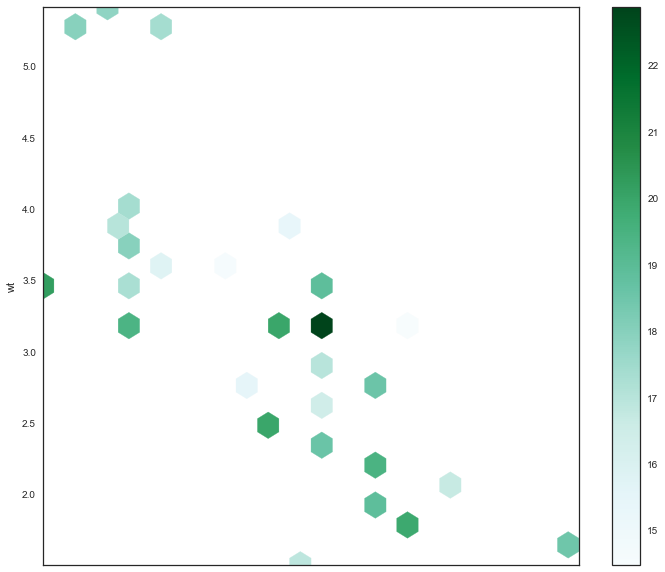

In [168]:
mtcars.plot.hexbin(x='drat', y='wt', C='qsec', reduce_C_function=np.max, gridsize=25, figsize=(12,10))

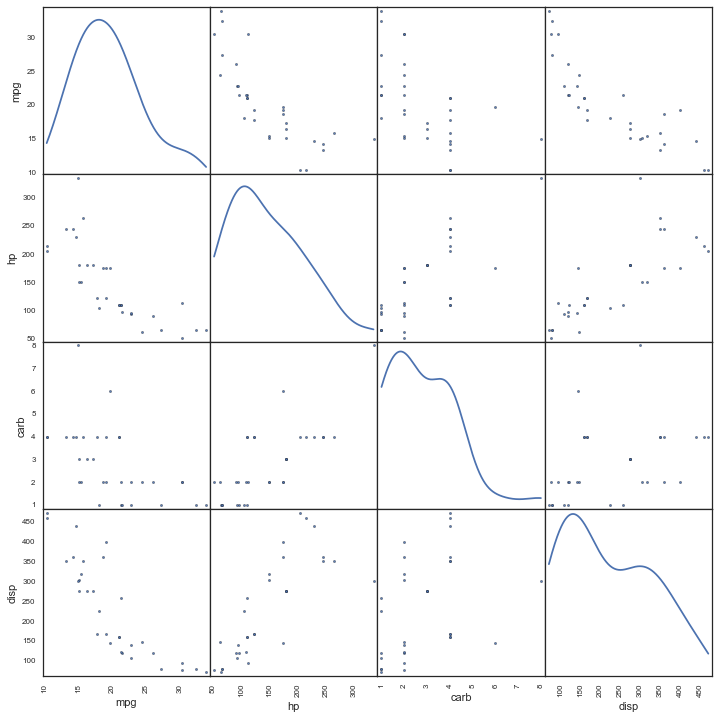

In [169]:
sss= scatter_matrix(mtcars[['mpg','hp','carb','disp']], alpha=0.9, figsize=(12, 12), color='black', diagonal='kde')

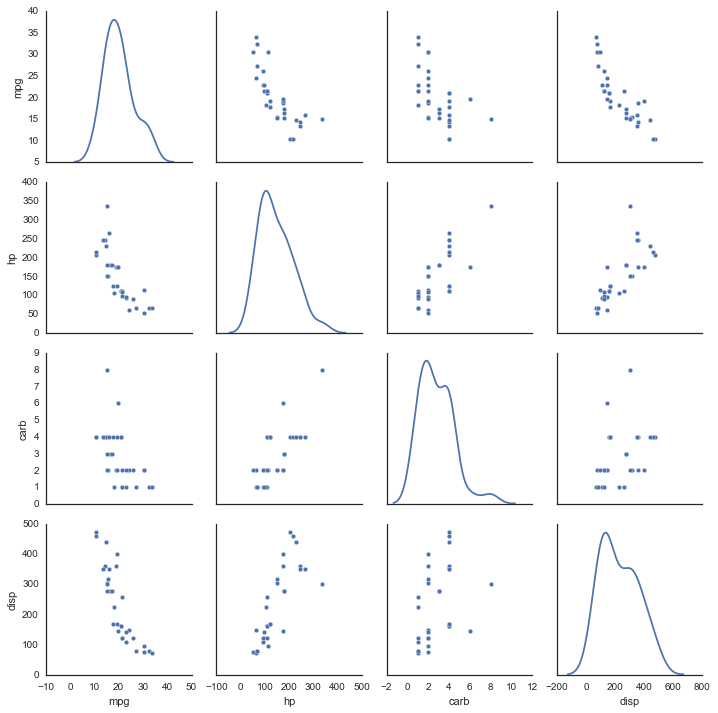

In [170]:
sns.pairplot(mtcars[['mpg','hp','carb','disp']],kind='scatter',diag_kind='kde')

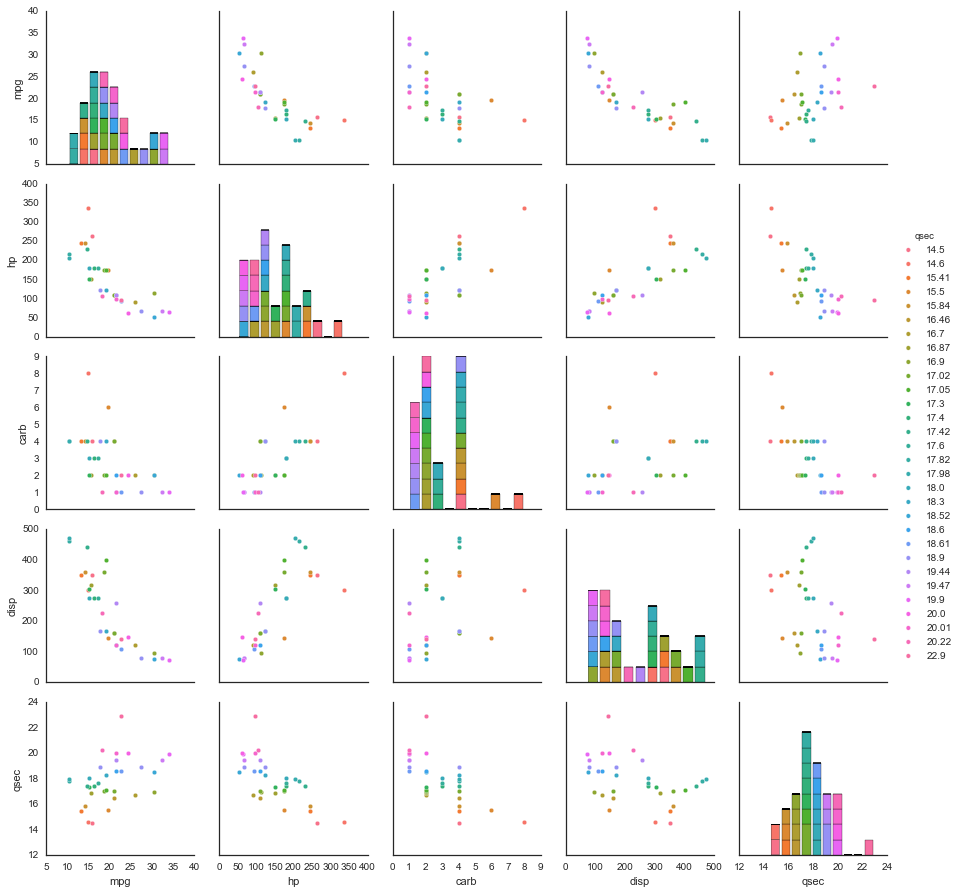

In [171]:
mtcars1 = mtcars[['mpg','hp','carb','disp','qsec']]
sns.pairplot(mtcars1, hue="qsec")

<a id='2.3d'></a>
### 2.3d diamonds 

In [172]:
# Find numerical variables

print set(diamonds.columns).difference(set(cv_diamonds))
ld_diamonds

set(['price', 'carat', 'depth', 'table', 'y', 'x', 'z'])


{'#': 53940,
 'carat': 273,
 'clarity': 8,
 'color': 7,
 'cut': 5,
 'depth': 184,
 'price': 11602,
 'table': 127,
 'x': 554,
 'y': 552,
 'z': 375}

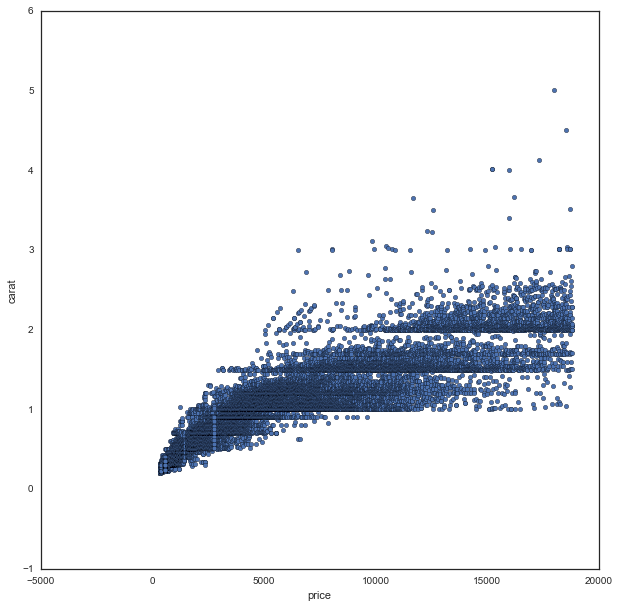

In [173]:
diamonds.plot.scatter(x='price', y='carat', figsize=(10,10))

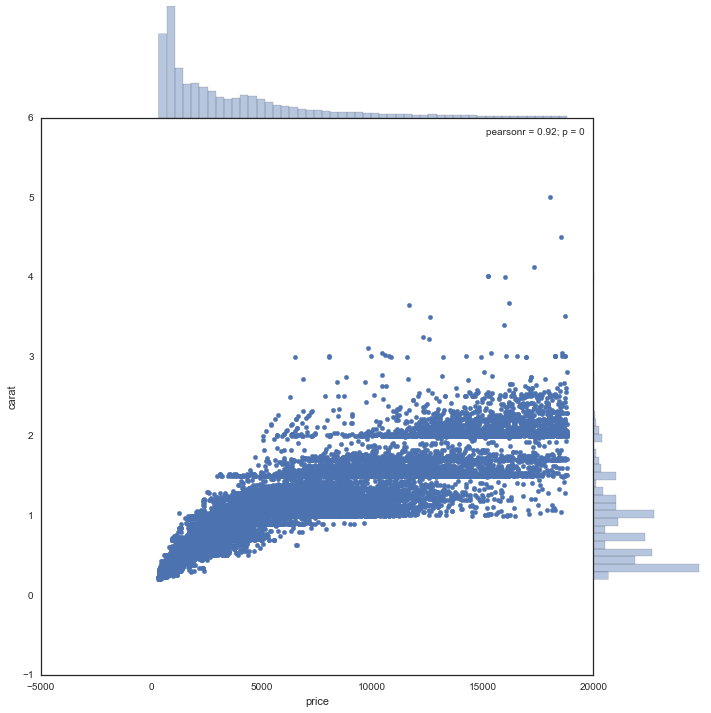

In [174]:
sns.jointplot(x="price", y="carat", data=diamonds, space=0, size=10)

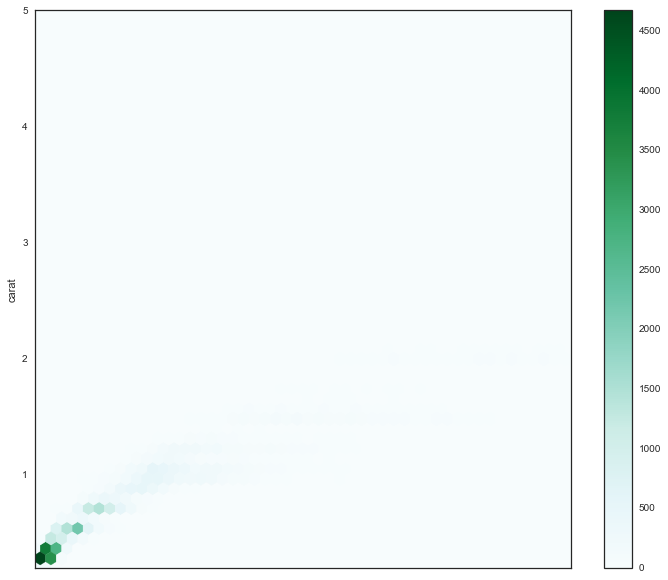

In [175]:
diamonds.plot.hexbin(x='price', y='carat', gridsize=50, figsize=(12,10))

(0, 1)

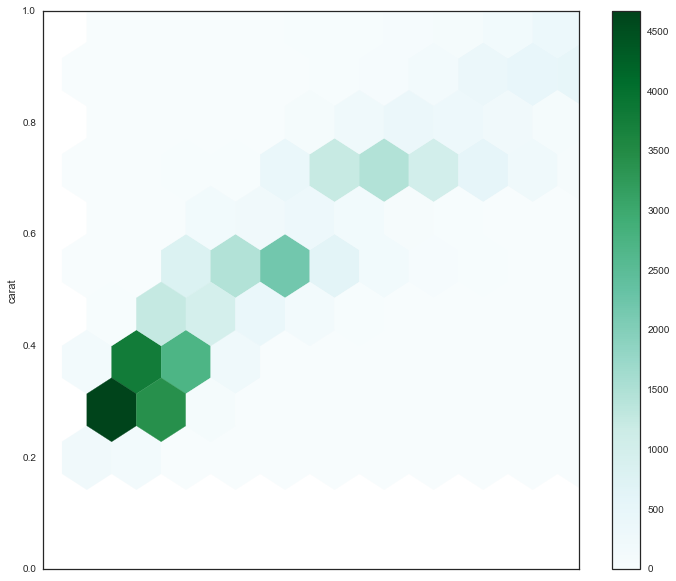

In [176]:
ax=diamonds.plot.hexbin(x='price', y='carat', gridsize=50, figsize=(12,10))
ax.set_xlim(0,4000)
ax.set_ylim(0,1)

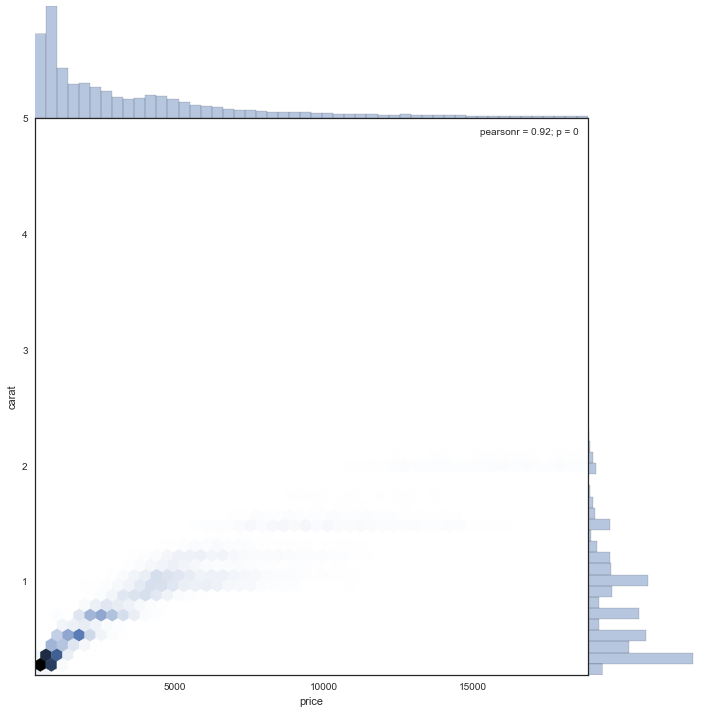

In [177]:
sns.jointplot("price", "carat", data=diamonds, kind="hex", gridsize=50, space=0, size=10)

[(0, 1), (0, 4000)]

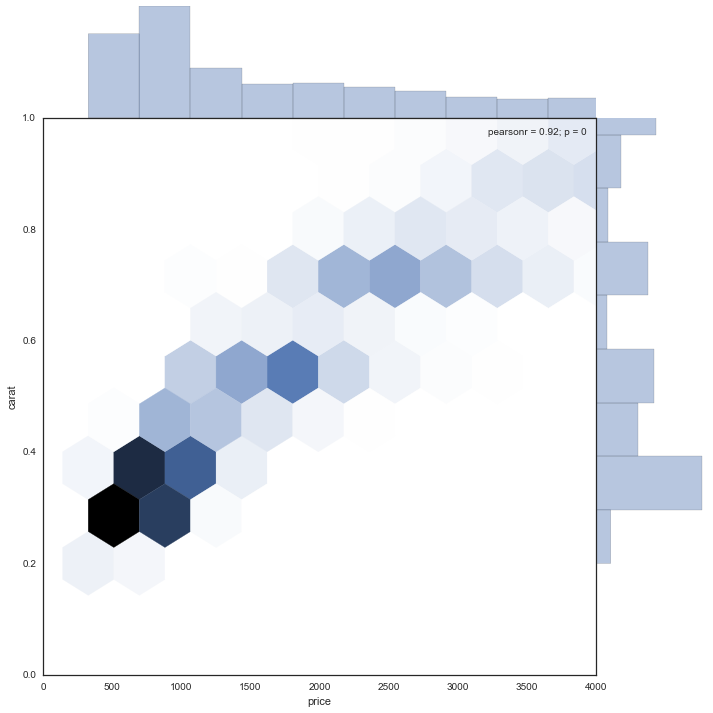

In [178]:
g=sns.jointplot("price", "carat", data=diamonds, kind="hex", gridsize=50, space=0, size=10)
g.ax_joint.set(xlim=(0, 4000), ylim=(0, 1))

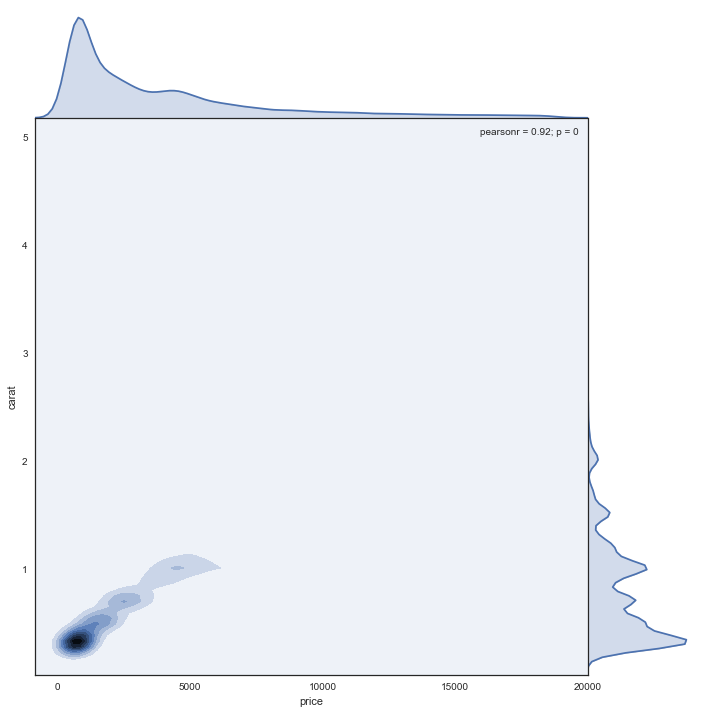

In [179]:
sns.jointplot("price", "carat", data=diamonds, kind="kde", space=0, size=10)

[(0, 1), (0, 4000)]

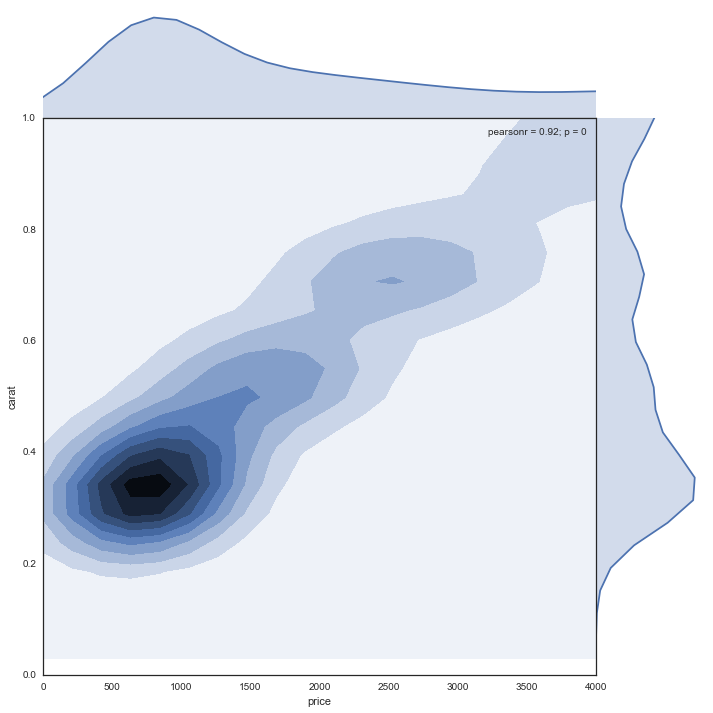

In [180]:
g=sns.jointplot("price", "carat", data=diamonds, kind="kde", space=0, size=10)
g.ax_joint.set(xlim=(0, 4000), ylim=(0, 1))

/Users/mosesboudourides/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


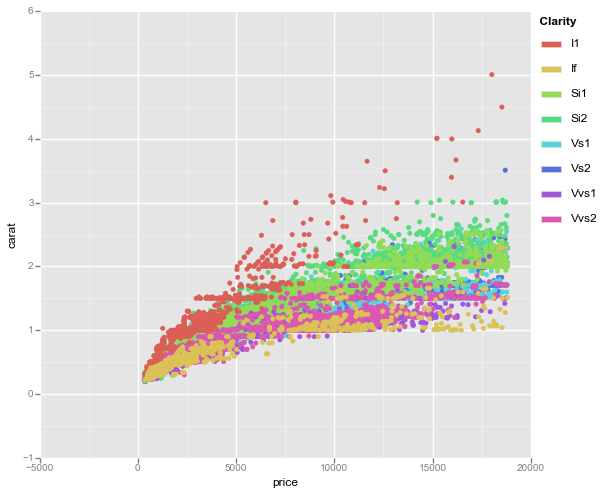

<ggplot: (342806809)>

In [181]:
p = ggplot(aes(x='price', y='carat',color="clarity"), data=diamonds)
p + geom_point()

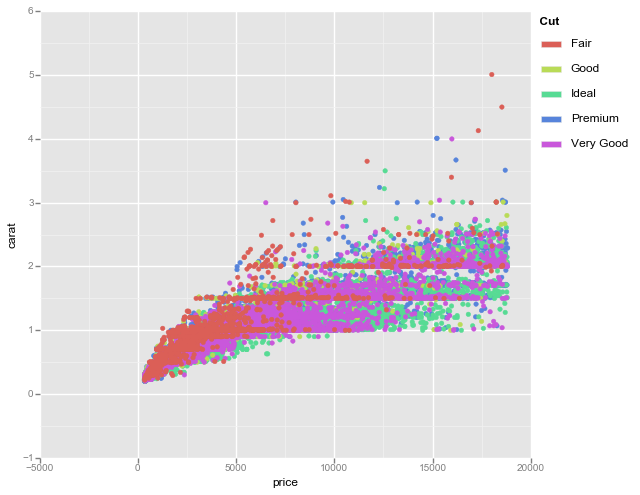

<ggplot: (345391469)>

In [182]:
p = ggplot(aes(x='price', y='carat',color="cut"), data=diamonds)
p + geom_point()

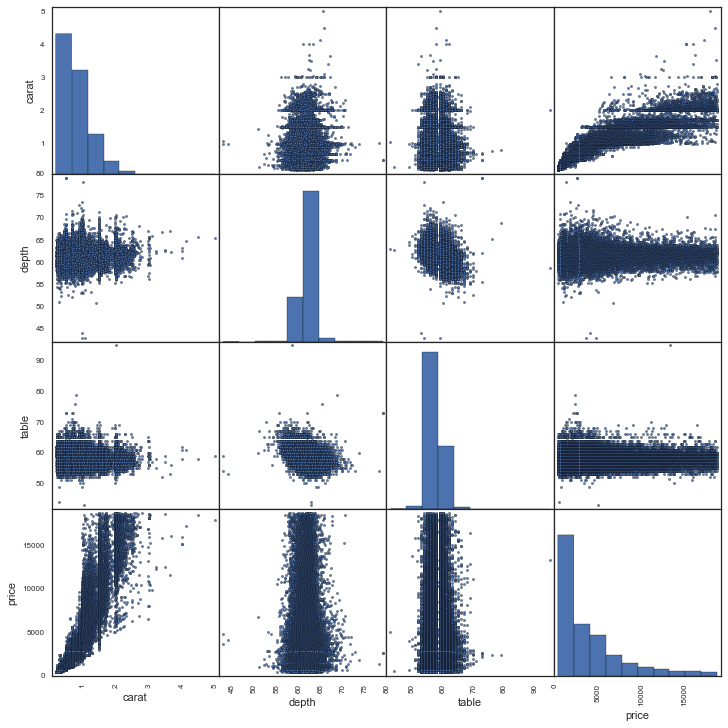

In [183]:
sss = scatter_matrix(diamonds[['carat','depth','table','price']], alpha=0.9, figsize=(12, 12), color='black', diagonal='hist')

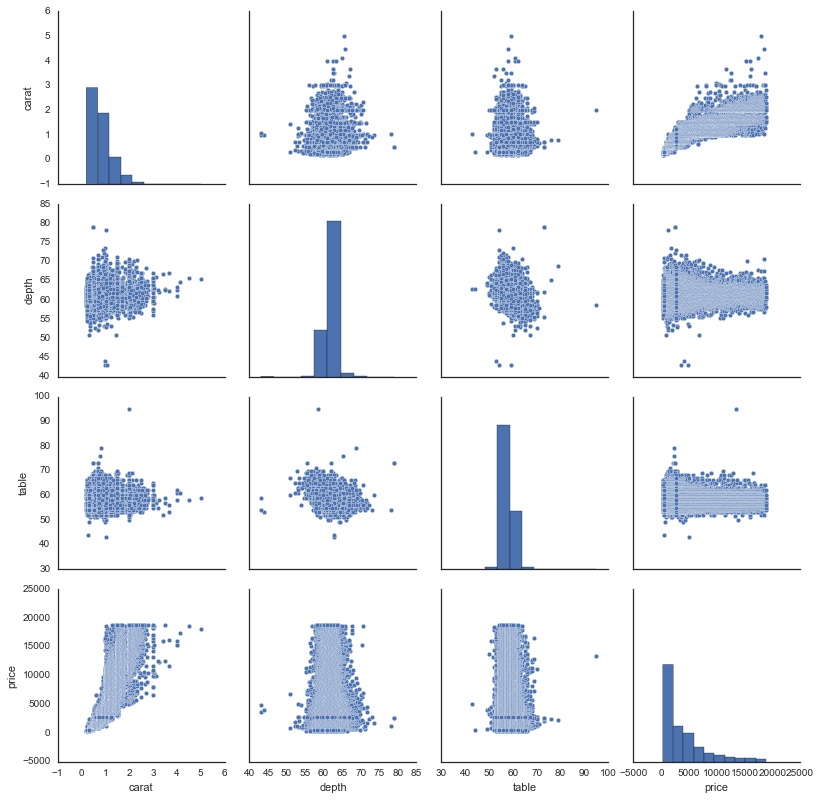

In [184]:
sns.pairplot(diamonds[['carat','depth','table','price']],kind='scatter',diag_kind='hist',size=2.8)

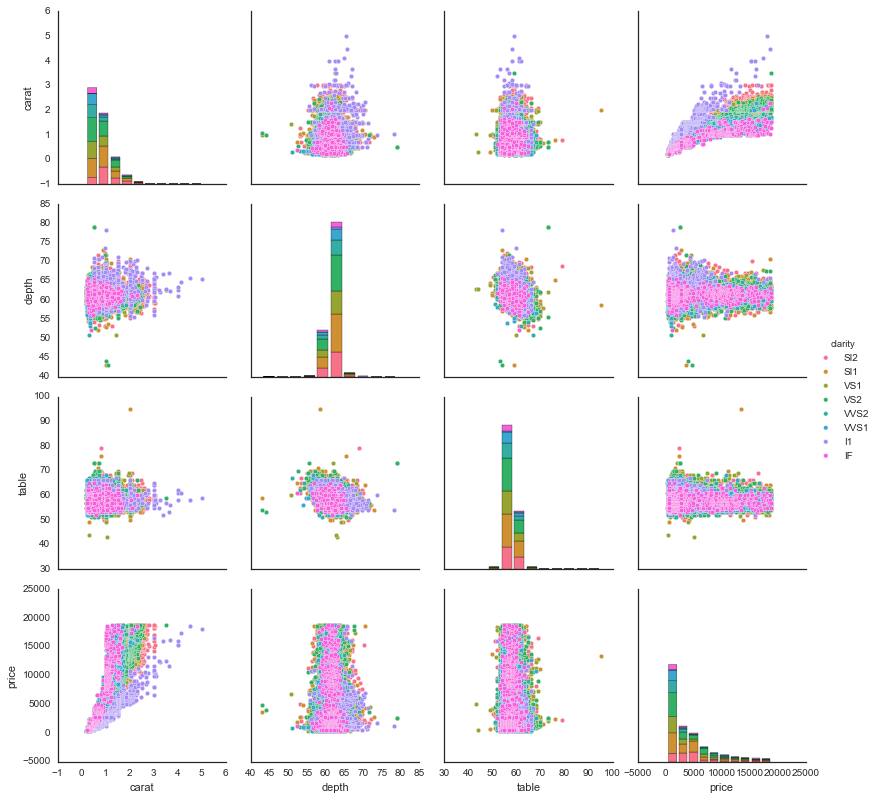

In [185]:
diamonds1 = diamonds[['carat','depth','table','price','clarity']]
sns.pairplot(diamonds1, hue="clarity", size=2.8)

<a id='2.3e'></a>
### 2.3e iris 

In [186]:
iris = sns.load_dataset("iris")
iris.shape

(150, 5)

In [187]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [188]:
# Find categorical/numerical variables (columns):

print iris.applymap(lambda x: isinstance(x, str)).any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species          True
dtype: bool


In [189]:
cv_iris = ['species']
print 'Numerical variables:', list(set(iris.columns).difference(set(cv_iris)))

ld_iris = {}
for i in iris.columns.tolist():
    ld_iris[i] = len(iris[i].unique())
print ld_iris

Numerical variables: ['sepal_width', 'petal_width', 'sepal_length', 'petal_length']
{'sepal_width': 23, 'petal_width': 22, 'species': 3, 'sepal_length': 35, 'petal_length': 43}


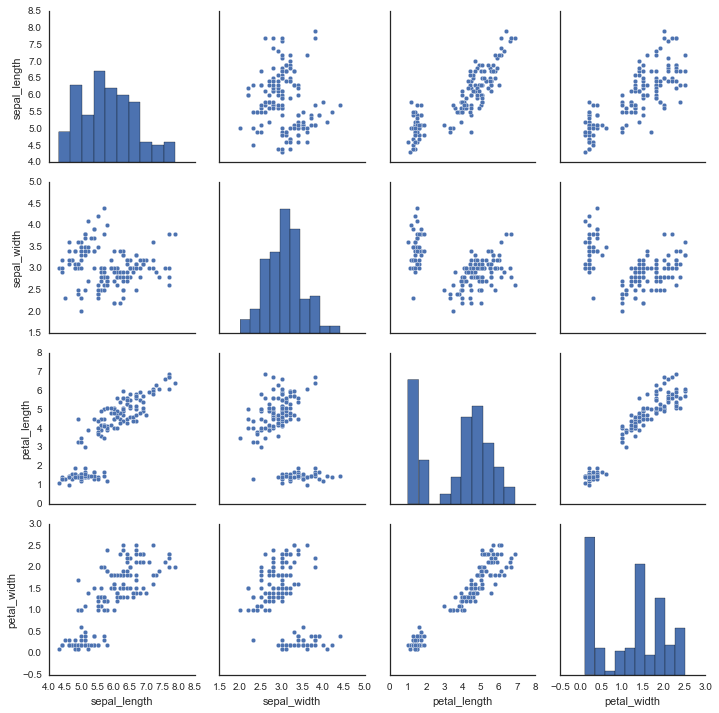

In [190]:
g = sns.pairplot(iris)

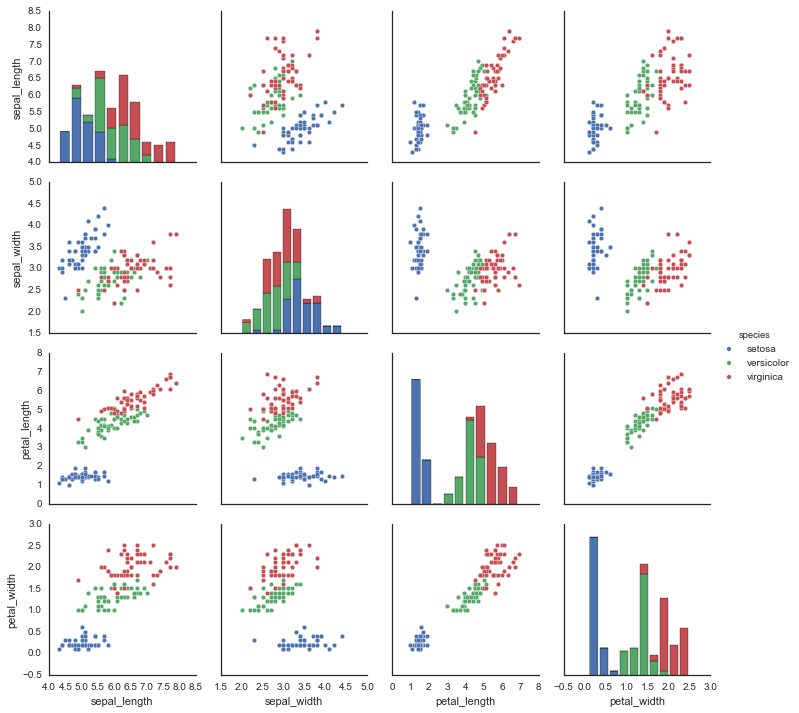

In [191]:
g = sns.pairplot(iris, hue="species")

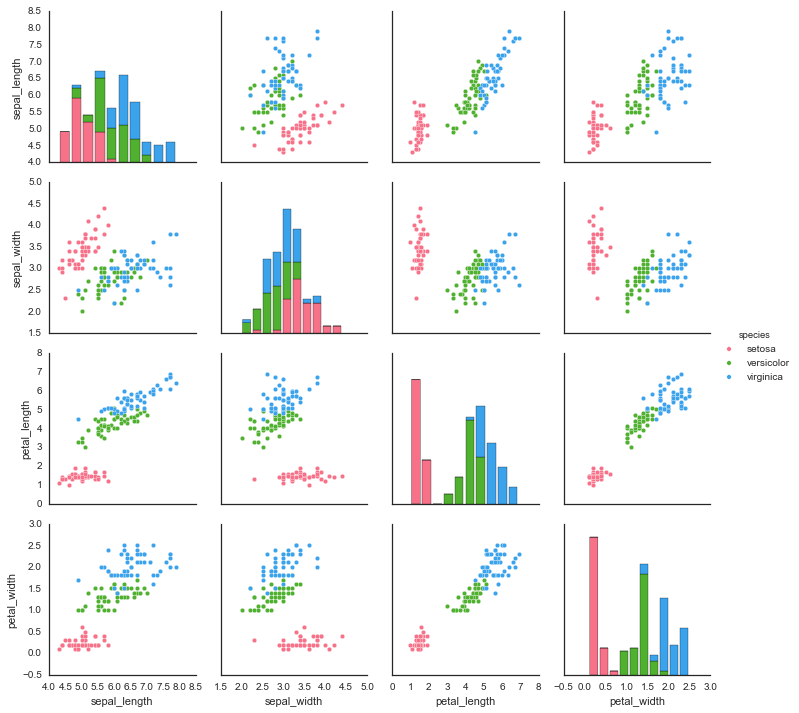

In [192]:
g = sns.pairplot(iris, hue="species", palette="husl")

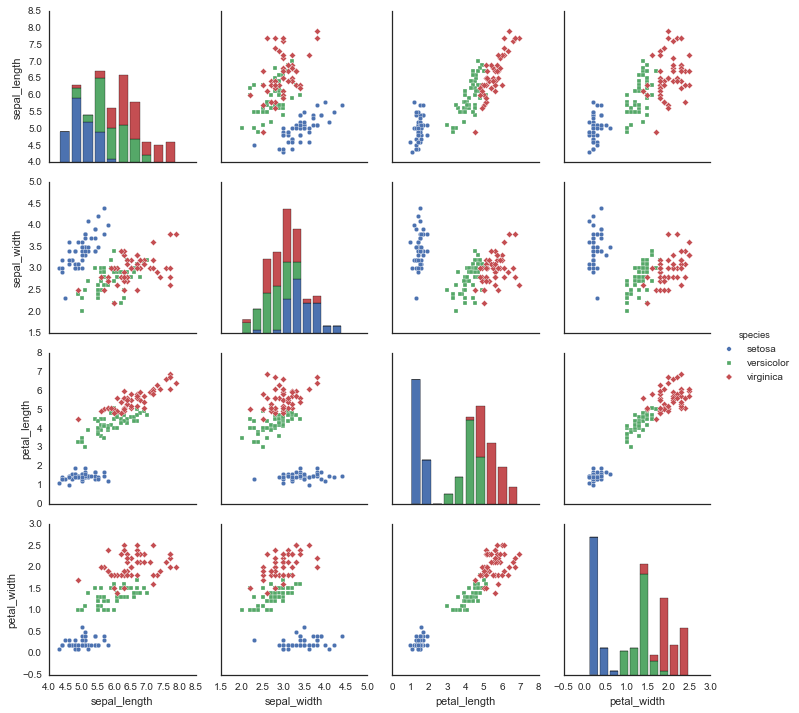

In [193]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])